## AEP

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import model_summary as model_class
import prophet_linear_adjust as prophet_based

%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_aep = pd.read_csv("AEP_hourly.csv")
df_aep.rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'}, inplace=True)
df_aep['ds'] = pd.to_datetime(df_aep['ds'], format='%Y-%m-%d %H:%M:%S')
out_dir = 'AEP_results'

### test prophet based without seasonality

In [4]:
daily_demand_aep = df_aep.groupby(df_aep['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

results_prophet = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_aep, date_start, date_end, daily_demand_aep, manual = False, daily = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet = pd.concat(results_prophet, ignore_index=True)

results_prophet.to_csv(out_dir + '/results_prophet.csv', index=False)

fit model 2008-10-02 00:00:00


12:19:11 - cmdstanpy - INFO - Chain [1] start processing
12:19:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-03 00:00:00


12:19:19 - cmdstanpy - INFO - Chain [1] start processing
12:19:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-04 00:00:00


12:19:26 - cmdstanpy - INFO - Chain [1] start processing
12:19:35 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-05 00:00:00


12:19:35 - cmdstanpy - INFO - Chain [1] start processing
12:19:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-06 00:00:00


12:19:44 - cmdstanpy - INFO - Chain [1] start processing
12:19:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-07 00:00:00


12:19:53 - cmdstanpy - INFO - Chain [1] start processing
12:20:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-08 00:00:00


12:20:03 - cmdstanpy - INFO - Chain [1] start processing
12:20:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-09 00:00:00


12:20:12 - cmdstanpy - INFO - Chain [1] start processing
12:20:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-10 00:00:00


12:20:21 - cmdstanpy - INFO - Chain [1] start processing
12:20:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-11 00:00:00


12:20:29 - cmdstanpy - INFO - Chain [1] start processing
12:20:35 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-12 00:00:00


12:20:36 - cmdstanpy - INFO - Chain [1] start processing
12:20:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-13 00:00:00


12:20:45 - cmdstanpy - INFO - Chain [1] start processing
12:20:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-14 00:00:00


12:20:53 - cmdstanpy - INFO - Chain [1] start processing
12:21:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-15 00:00:00


12:21:02 - cmdstanpy - INFO - Chain [1] start processing
12:21:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-16 00:00:00


12:21:10 - cmdstanpy - INFO - Chain [1] start processing
12:21:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-17 00:00:00


12:21:18 - cmdstanpy - INFO - Chain [1] start processing
12:21:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-18 00:00:00


12:21:27 - cmdstanpy - INFO - Chain [1] start processing
12:21:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-19 00:00:00


12:21:35 - cmdstanpy - INFO - Chain [1] start processing
12:21:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-20 00:00:00


12:21:42 - cmdstanpy - INFO - Chain [1] start processing
12:21:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-21 00:00:00


12:21:50 - cmdstanpy - INFO - Chain [1] start processing
12:21:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-22 00:00:00


12:21:58 - cmdstanpy - INFO - Chain [1] start processing
12:22:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-23 00:00:00


12:22:07 - cmdstanpy - INFO - Chain [1] start processing
12:22:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-24 00:00:00


12:22:14 - cmdstanpy - INFO - Chain [1] start processing
12:22:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-25 00:00:00


12:22:25 - cmdstanpy - INFO - Chain [1] start processing
12:22:35 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-26 00:00:00


12:22:36 - cmdstanpy - INFO - Chain [1] start processing
12:22:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-27 00:00:00


12:22:48 - cmdstanpy - INFO - Chain [1] start processing
12:22:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-28 00:00:00


12:22:57 - cmdstanpy - INFO - Chain [1] start processing
12:23:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-29 00:00:00


12:23:06 - cmdstanpy - INFO - Chain [1] start processing
12:23:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-30 00:00:00


12:23:15 - cmdstanpy - INFO - Chain [1] start processing
12:23:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-31 00:00:00


12:23:24 - cmdstanpy - INFO - Chain [1] start processing
12:23:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-01 00:00:00


12:23:33 - cmdstanpy - INFO - Chain [1] start processing
12:23:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-02 00:00:00


12:23:41 - cmdstanpy - INFO - Chain [1] start processing
12:23:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-03 00:00:00


12:23:49 - cmdstanpy - INFO - Chain [1] start processing
12:23:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-04 00:00:00


12:23:58 - cmdstanpy - INFO - Chain [1] start processing
12:24:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-05 00:00:00


12:24:06 - cmdstanpy - INFO - Chain [1] start processing
12:24:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-06 00:00:00


12:24:13 - cmdstanpy - INFO - Chain [1] start processing
12:24:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-07 00:00:00


12:24:20 - cmdstanpy - INFO - Chain [1] start processing
12:24:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-08 00:00:00


12:24:28 - cmdstanpy - INFO - Chain [1] start processing
12:24:35 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-09 00:00:00


12:24:36 - cmdstanpy - INFO - Chain [1] start processing
12:24:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-10 00:00:00


12:24:45 - cmdstanpy - INFO - Chain [1] start processing
12:24:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-11 00:00:00


12:24:53 - cmdstanpy - INFO - Chain [1] start processing
12:25:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-12 00:00:00


12:25:02 - cmdstanpy - INFO - Chain [1] start processing
12:25:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-13 00:00:00


12:25:09 - cmdstanpy - INFO - Chain [1] start processing
12:25:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-14 00:00:00


12:25:16 - cmdstanpy - INFO - Chain [1] start processing
12:25:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-15 00:00:00


12:25:25 - cmdstanpy - INFO - Chain [1] start processing
12:25:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-16 00:00:00


12:25:32 - cmdstanpy - INFO - Chain [1] start processing
12:25:38 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-17 00:00:00


12:25:39 - cmdstanpy - INFO - Chain [1] start processing
12:25:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-18 00:00:00


12:25:45 - cmdstanpy - INFO - Chain [1] start processing
12:25:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-19 00:00:00


12:25:53 - cmdstanpy - INFO - Chain [1] start processing
12:26:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-20 00:00:00


12:26:01 - cmdstanpy - INFO - Chain [1] start processing
12:26:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-21 00:00:00


12:26:09 - cmdstanpy - INFO - Chain [1] start processing
12:26:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-22 00:00:00


12:26:17 - cmdstanpy - INFO - Chain [1] start processing
12:26:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-23 00:00:00


12:26:26 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-24 00:00:00


12:26:33 - cmdstanpy - INFO - Chain [1] start processing
12:26:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-25 00:00:00


12:26:40 - cmdstanpy - INFO - Chain [1] start processing
12:26:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-26 00:00:00


12:26:49 - cmdstanpy - INFO - Chain [1] start processing
12:26:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-27 00:00:00


12:26:56 - cmdstanpy - INFO - Chain [1] start processing
12:27:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-28 00:00:00


12:27:03 - cmdstanpy - INFO - Chain [1] start processing
12:27:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-29 00:00:00


12:27:10 - cmdstanpy - INFO - Chain [1] start processing
12:27:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-30 00:00:00


12:27:18 - cmdstanpy - INFO - Chain [1] start processing
12:27:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-01 00:00:00


12:27:29 - cmdstanpy - INFO - Chain [1] start processing
12:27:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-02 00:00:00


12:27:38 - cmdstanpy - INFO - Chain [1] start processing
12:27:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-03 00:00:00


12:27:47 - cmdstanpy - INFO - Chain [1] start processing
12:27:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-04 00:00:00


12:27:55 - cmdstanpy - INFO - Chain [1] start processing
12:28:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-05 00:00:00


12:28:03 - cmdstanpy - INFO - Chain [1] start processing
12:28:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-06 00:00:00


12:28:14 - cmdstanpy - INFO - Chain [1] start processing
12:28:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-07 00:00:00


12:28:23 - cmdstanpy - INFO - Chain [1] start processing
12:28:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-08 00:00:00


12:28:33 - cmdstanpy - INFO - Chain [1] start processing
12:28:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-09 00:00:00


12:28:40 - cmdstanpy - INFO - Chain [1] start processing
12:28:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-10 00:00:00


12:28:50 - cmdstanpy - INFO - Chain [1] start processing
12:28:56 - cmdstanpy - INFO - Chain [1] done processing


### test prophet based with seasonality

In [6]:
daily_demand_aep = df_aep.groupby(df_aep['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

results_prophet_w = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_aep, date_start, date_end, daily_demand_aep, manual = False, daily = True, weekly = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet_w.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet_w = pd.concat(results_prophet_w, ignore_index=True)

results_prophet_w.to_csv(out_dir + '/results_prophet_w.csv', index=False)

fit model 2008-10-02 00:00:00


12:32:37 - cmdstanpy - INFO - Chain [1] start processing
12:32:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-03 00:00:00


12:32:47 - cmdstanpy - INFO - Chain [1] start processing
12:32:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-04 00:00:00


12:32:55 - cmdstanpy - INFO - Chain [1] start processing
12:33:04 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-05 00:00:00


12:33:06 - cmdstanpy - INFO - Chain [1] start processing
12:33:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-06 00:00:00


12:33:15 - cmdstanpy - INFO - Chain [1] start processing
12:33:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-07 00:00:00


12:33:27 - cmdstanpy - INFO - Chain [1] start processing
12:33:38 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-08 00:00:00


12:33:40 - cmdstanpy - INFO - Chain [1] start processing
12:33:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-09 00:00:00


12:33:53 - cmdstanpy - INFO - Chain [1] start processing
12:34:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-10 00:00:00


12:34:04 - cmdstanpy - INFO - Chain [1] start processing
12:34:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-11 00:00:00


12:34:14 - cmdstanpy - INFO - Chain [1] start processing
12:34:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-12 00:00:00


12:34:23 - cmdstanpy - INFO - Chain [1] start processing
12:34:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-13 00:00:00


12:34:33 - cmdstanpy - INFO - Chain [1] start processing
12:34:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-14 00:00:00


12:34:44 - cmdstanpy - INFO - Chain [1] start processing
12:34:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-15 00:00:00


12:34:53 - cmdstanpy - INFO - Chain [1] start processing
12:35:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-16 00:00:00


12:35:04 - cmdstanpy - INFO - Chain [1] start processing
12:35:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-17 00:00:00


12:35:14 - cmdstanpy - INFO - Chain [1] start processing
12:35:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-18 00:00:00


12:35:24 - cmdstanpy - INFO - Chain [1] start processing
12:35:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-19 00:00:00


12:35:38 - cmdstanpy - INFO - Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-20 00:00:00


12:35:49 - cmdstanpy - INFO - Chain [1] start processing
12:35:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-21 00:00:00


12:35:59 - cmdstanpy - INFO - Chain [1] start processing
12:36:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-22 00:00:00


12:36:11 - cmdstanpy - INFO - Chain [1] start processing
12:36:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-23 00:00:00


12:36:21 - cmdstanpy - INFO - Chain [1] start processing
12:36:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-24 00:00:00


12:36:31 - cmdstanpy - INFO - Chain [1] start processing
12:36:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-25 00:00:00


12:36:41 - cmdstanpy - INFO - Chain [1] start processing
12:36:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-26 00:00:00


12:36:51 - cmdstanpy - INFO - Chain [1] start processing
12:36:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-27 00:00:00


12:37:00 - cmdstanpy - INFO - Chain [1] start processing
12:37:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-28 00:00:00


12:37:10 - cmdstanpy - INFO - Chain [1] start processing
12:37:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-29 00:00:00


12:37:21 - cmdstanpy - INFO - Chain [1] start processing
12:37:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-30 00:00:00


12:37:34 - cmdstanpy - INFO - Chain [1] start processing
12:37:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-31 00:00:00


12:37:47 - cmdstanpy - INFO - Chain [1] start processing
12:37:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-01 00:00:00


12:37:54 - cmdstanpy - INFO - Chain [1] start processing
12:38:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-02 00:00:00


12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-03 00:00:00


12:38:13 - cmdstanpy - INFO - Chain [1] start processing
12:38:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-04 00:00:00


12:38:24 - cmdstanpy - INFO - Chain [1] start processing
12:38:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-05 00:00:00


12:38:34 - cmdstanpy - INFO - Chain [1] start processing
12:38:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-06 00:00:00


12:38:44 - cmdstanpy - INFO - Chain [1] start processing
12:38:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-07 00:00:00


12:38:54 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-08 00:00:00


12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-09 00:00:00


12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-10 00:00:00


12:39:20 - cmdstanpy - INFO - Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-11 00:00:00


12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-12 00:00:00


12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-13 00:00:00


12:39:47 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-14 00:00:00


12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-15 00:00:00


12:40:04 - cmdstanpy - INFO - Chain [1] start processing
12:40:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-16 00:00:00


12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-17 00:00:00


12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-18 00:00:00


12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-19 00:00:00


12:40:43 - cmdstanpy - INFO - Chain [1] start processing
12:40:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-20 00:00:00


12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-21 00:00:00


12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-22 00:00:00


12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-23 00:00:00


12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-24 00:00:00


12:41:31 - cmdstanpy - INFO - Chain [1] start processing
12:41:38 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-25 00:00:00


12:41:39 - cmdstanpy - INFO - Chain [1] start processing
12:41:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-26 00:00:00


12:41:48 - cmdstanpy - INFO - Chain [1] start processing
12:41:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-27 00:00:00


12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:42:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-28 00:00:00


12:42:06 - cmdstanpy - INFO - Chain [1] start processing
12:42:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-29 00:00:00


12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-30 00:00:00


12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-01 00:00:00


12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-02 00:00:00


12:42:41 - cmdstanpy - INFO - Chain [1] start processing
12:42:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-03 00:00:00


12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-04 00:00:00


12:43:00 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-05 00:00:00


12:43:11 - cmdstanpy - INFO - Chain [1] start processing
12:43:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-06 00:00:00


12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-07 00:00:00


12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-08 00:00:00


12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-09 00:00:00


12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-10 00:00:00


12:44:01 - cmdstanpy - INFO - Chain [1] start processing
12:44:08 - cmdstanpy - INFO - Chain [1] done processing


### test prophet based with weekly, yearly

In [8]:
daily_demand_aep = df_aep.groupby(df_aep['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

results_prophet_w = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_aep, date_start, date_end, daily_demand_aep, manual = False, daily = True, weekly = True, yearly = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet_w.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet_w = pd.concat(results_prophet_w, ignore_index=True)

results_prophet_w.to_csv(out_dir + '/results_prophet_wy.csv', index=False)

fit model 2008-10-02 00:00:00


11:55:43 - cmdstanpy - INFO - Chain [1] start processing
11:55:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-03 00:00:00


11:55:48 - cmdstanpy - INFO - Chain [1] start processing
11:55:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-04 00:00:00


11:55:55 - cmdstanpy - INFO - Chain [1] start processing
11:56:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-05 00:00:00


11:56:03 - cmdstanpy - INFO - Chain [1] start processing
11:56:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-06 00:00:00


11:56:13 - cmdstanpy - INFO - Chain [1] start processing
11:56:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-07 00:00:00


11:56:20 - cmdstanpy - INFO - Chain [1] start processing
11:56:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-08 00:00:00


11:56:29 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-09 00:00:00


11:56:38 - cmdstanpy - INFO - Chain [1] start processing
11:56:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-10 00:00:00


11:56:51 - cmdstanpy - INFO - Chain [1] start processing
11:56:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-11 00:00:00


11:57:01 - cmdstanpy - INFO - Chain [1] start processing
11:57:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-12 00:00:00


11:57:11 - cmdstanpy - INFO - Chain [1] start processing
11:57:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-13 00:00:00


11:57:21 - cmdstanpy - INFO - Chain [1] start processing
11:57:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-14 00:00:00


11:57:35 - cmdstanpy - INFO - Chain [1] start processing
11:57:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-15 00:00:00


11:57:45 - cmdstanpy - INFO - Chain [1] start processing
11:57:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-16 00:00:00


11:57:58 - cmdstanpy - INFO - Chain [1] start processing
11:58:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-17 00:00:00


11:58:09 - cmdstanpy - INFO - Chain [1] start processing
11:58:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-18 00:00:00


11:58:22 - cmdstanpy - INFO - Chain [1] start processing
11:58:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-19 00:00:00


11:58:34 - cmdstanpy - INFO - Chain [1] start processing
11:58:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-20 00:00:00


11:58:45 - cmdstanpy - INFO - Chain [1] start processing
11:58:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-21 00:00:00


11:58:59 - cmdstanpy - INFO - Chain [1] start processing
11:59:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-22 00:00:00


11:59:07 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-23 00:00:00


11:59:13 - cmdstanpy - INFO - Chain [1] start processing
11:59:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-24 00:00:00


11:59:19 - cmdstanpy - INFO - Chain [1] start processing
11:59:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-25 00:00:00


11:59:31 - cmdstanpy - INFO - Chain [1] start processing
11:59:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-26 00:00:00


11:59:42 - cmdstanpy - INFO - Chain [1] start processing
11:59:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-27 00:00:00


11:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-28 00:00:00


12:00:05 - cmdstanpy - INFO - Chain [1] start processing
12:00:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-29 00:00:00


12:00:11 - cmdstanpy - INFO - Chain [1] start processing
12:00:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-30 00:00:00


12:00:18 - cmdstanpy - INFO - Chain [1] start processing
12:00:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-10-31 00:00:00


12:00:24 - cmdstanpy - INFO - Chain [1] start processing
12:00:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-01 00:00:00


12:00:33 - cmdstanpy - INFO - Chain [1] start processing
12:00:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-02 00:00:00


12:00:40 - cmdstanpy - INFO - Chain [1] start processing
12:00:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-03 00:00:00


12:00:47 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-04 00:00:00


12:00:54 - cmdstanpy - INFO - Chain [1] start processing
12:01:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-05 00:00:00


12:01:02 - cmdstanpy - INFO - Chain [1] start processing
12:01:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-06 00:00:00


12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-07 00:00:00


12:01:19 - cmdstanpy - INFO - Chain [1] start processing
12:01:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-08 00:00:00


12:01:29 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-09 00:00:00


12:01:38 - cmdstanpy - INFO - Chain [1] start processing
12:01:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-10 00:00:00


12:01:49 - cmdstanpy - INFO - Chain [1] start processing
12:01:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-11 00:00:00


12:01:57 - cmdstanpy - INFO - Chain [1] start processing
12:02:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-12 00:00:00


12:02:08 - cmdstanpy - INFO - Chain [1] start processing
12:02:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-13 00:00:00


12:02:18 - cmdstanpy - INFO - Chain [1] start processing
12:02:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-14 00:00:00


12:02:27 - cmdstanpy - INFO - Chain [1] start processing
12:02:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-15 00:00:00


12:02:35 - cmdstanpy - INFO - Chain [1] start processing
12:02:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-16 00:00:00


12:02:41 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-17 00:00:00


12:02:50 - cmdstanpy - INFO - Chain [1] start processing
12:02:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-18 00:00:00


12:02:56 - cmdstanpy - INFO - Chain [1] start processing
12:03:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-19 00:00:00


12:03:04 - cmdstanpy - INFO - Chain [1] start processing
12:03:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-20 00:00:00


12:03:11 - cmdstanpy - INFO - Chain [1] start processing
12:03:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-21 00:00:00


12:03:20 - cmdstanpy - INFO - Chain [1] start processing
12:03:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-22 00:00:00


12:03:31 - cmdstanpy - INFO - Chain [1] start processing
12:03:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-23 00:00:00


12:03:42 - cmdstanpy - INFO - Chain [1] start processing
12:03:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-24 00:00:00


12:03:54 - cmdstanpy - INFO - Chain [1] start processing
12:04:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-25 00:00:00


12:04:08 - cmdstanpy - INFO - Chain [1] start processing
12:04:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-26 00:00:00


12:04:18 - cmdstanpy - INFO - Chain [1] start processing
12:04:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-27 00:00:00


12:04:31 - cmdstanpy - INFO - Chain [1] start processing
12:04:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-28 00:00:00


12:04:41 - cmdstanpy - INFO - Chain [1] start processing
12:04:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-29 00:00:00


12:04:53 - cmdstanpy - INFO - Chain [1] start processing
12:05:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-11-30 00:00:00


12:05:04 - cmdstanpy - INFO - Chain [1] start processing
12:05:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-01 00:00:00


12:05:15 - cmdstanpy - INFO - Chain [1] start processing
12:05:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-02 00:00:00


12:05:27 - cmdstanpy - INFO - Chain [1] start processing
12:05:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-03 00:00:00


12:05:38 - cmdstanpy - INFO - Chain [1] start processing
12:05:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-04 00:00:00


12:05:48 - cmdstanpy - INFO - Chain [1] start processing
12:05:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-05 00:00:00


12:05:58 - cmdstanpy - INFO - Chain [1] start processing
12:06:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-06 00:00:00


12:06:08 - cmdstanpy - INFO - Chain [1] start processing
12:06:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-07 00:00:00


12:06:23 - cmdstanpy - INFO - Chain [1] start processing
12:06:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-08 00:00:00


12:06:34 - cmdstanpy - INFO - Chain [1] start processing
12:06:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-09 00:00:00


12:06:45 - cmdstanpy - INFO - Chain [1] start processing
12:06:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2008-12-10 00:00:00


12:06:56 - cmdstanpy - INFO - Chain [1] start processing
12:07:04 - cmdstanpy - INFO - Chain [1] done processing


### test RNN+self convolution

In [3]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con.to_csv(out_dir + '/results_aep_self_con.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1081: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {epoch+1} loss:", float(loss))


epoch 1 loss: 0.74363774061203
epoch 2 loss: 0.42372915148735046
epoch 3 loss: 0.34425923228263855
epoch 4 loss: 0.29446545243263245
epoch 5 loss: 0.19785860180854797
epoch 6 loss: 0.20438528060913086
epoch 7 loss: 0.1875699907541275
epoch 8 loss: 0.19233396649360657
epoch 9 loss: 0.21584638953208923
epoch 10 loss: 0.17910407483577728
epoch 11 loss: 0.19281527400016785
epoch 12 loss: 0.20178668200969696
epoch 13 loss: 0.1655149757862091
epoch 14 loss: 0.20754076540470123
epoch 15 loss: 0.1967955231666565
epoch 16 loss: 0.16582460701465607
epoch 17 loss: 0.17262797057628632
epoch 18 loss: 0.16111493110656738
epoch 19 loss: 0.1905333250761032
epoch 20 loss: 0.17482037842273712
epoch 21 loss: 0.1752234399318695
epoch 22 loss: 0.18278919160366058
epoch 23 loss: 0.1224280297756195
epoch 24 loss: 0.1408056616783142
epoch 25 loss: 0.14818690717220306
epoch 26 loss: 0.14746227860450745
epoch 27 loss: 0.13546980917453766
epoch 28 loss: 0.24548032879829407
epoch 29 loss: 0.15961913764476776
epoc

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_15728/1001191365.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)


epoch 1 loss: 0.7818735837936401
epoch 2 loss: 0.8209155797958374
epoch 3 loss: 0.501896858215332
epoch 4 loss: 0.2610316276550293
epoch 5 loss: 0.22551284730434418
epoch 6 loss: 0.1767885833978653
epoch 7 loss: 0.19145676493644714
epoch 8 loss: 0.2291010469198227
epoch 9 loss: 0.16091540455818176
epoch 10 loss: 0.1813545972108841
epoch 11 loss: 0.1714954525232315
epoch 12 loss: 0.17892420291900635
epoch 13 loss: 0.170654296875
epoch 14 loss: 0.249619722366333
epoch 15 loss: 0.1584932506084442
epoch 16 loss: 0.17885731160640717
epoch 17 loss: 0.13654948770999908
epoch 18 loss: 0.15105800330638885
epoch 19 loss: 0.15069051086902618
epoch 20 loss: 0.15569670498371124
epoch 21 loss: 0.1633756309747696
epoch 22 loss: 0.1713956594467163
epoch 23 loss: 0.13184484839439392
epoch 24 loss: 0.1753690093755722
epoch 25 loss: 0.17290779948234558
epoch 26 loss: 0.10598540306091309
epoch 27 loss: 0.13724064826965332
epoch 28 loss: 0.12485364079475403
epoch 29 loss: 0.15892080962657928
epoch 30 loss:

KeyboardInterrupt: 

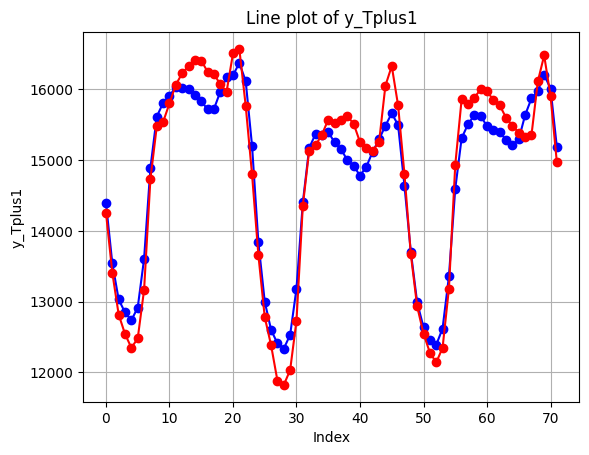

In [4]:
k = 24*3
x_ax = np.arange(len(results_aep_self_con['y'][:k]))

plt.plot(x_ax, results_aep_self_con['y_hat'][:k], marker="o", linestyle="-", color="b")
plt.plot(x_ax, results_aep_self_con['y'][:k], marker="o", linestyle="-", color="r")
plt.xlabel("Index")
plt.ylabel("y_Tplus1")
plt.title("Line plot of y_Tplus1")
plt.grid(True)
plt.show()

### test RNN+self convolution + numerical weekday

In [8]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wn = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wn()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wn = pd.concat([results_aep_self_con_wn, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con_wn.to_csv(out_dir + '/results_aep_self_con_wn.csv', index=False)

1
epoch 1 loss: 0.6716395020484924
epoch 2 loss: 0.4556232988834381
epoch 3 loss: 0.3228101134300232
epoch 4 loss: 0.2447081208229065
epoch 5 loss: 0.17460261285305023
epoch 6 loss: 0.1978360116481781
epoch 7 loss: 0.21279363334178925
epoch 8 loss: 0.18435551226139069
epoch 9 loss: 0.19015228748321533
epoch 10 loss: 0.1872287541627884
epoch 11 loss: 0.1599700003862381
epoch 12 loss: 0.15799812972545624
epoch 13 loss: 0.191727876663208
epoch 14 loss: 0.20354795455932617
epoch 15 loss: 0.16044828295707703
epoch 16 loss: 0.15399082005023956
epoch 17 loss: 0.13161246478557587
epoch 18 loss: 0.11924848705530167
epoch 19 loss: 0.17580987513065338
epoch 20 loss: 0.15082377195358276
epoch 21 loss: 0.1377718150615692
epoch 22 loss: 0.12725551426410675
epoch 23 loss: 0.09108277410268784
epoch 24 loss: 0.12582790851593018
epoch 25 loss: 0.11517995595932007
epoch 26 loss: 0.10474909096956253
epoch 27 loss: 0.12175706028938293
epoch 28 loss: 0.10018753260374069
epoch 29 loss: 0.10974211245775223
ep

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_60650/1946476654.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con_wn = pd.concat([results_aep_self_con_wn, result]).reset_index(drop=True)


epoch 1 loss: 0.7393772006034851
epoch 2 loss: 0.9175370931625366
epoch 3 loss: 0.38082191348075867
epoch 4 loss: 0.2910465598106384
epoch 5 loss: 0.22382289171218872
epoch 6 loss: 0.17806650698184967
epoch 7 loss: 0.18607467412948608
epoch 8 loss: 0.1945217251777649
epoch 9 loss: 0.1652352213859558
epoch 10 loss: 0.1673697680234909
epoch 11 loss: 0.22524112462997437
epoch 12 loss: 0.18695706129074097
epoch 13 loss: 0.17789317667484283
epoch 14 loss: 0.190596804022789
epoch 15 loss: 0.2010572999715805
epoch 16 loss: 0.172170951962471
epoch 17 loss: 0.19858890771865845
epoch 18 loss: 0.16897009313106537
epoch 19 loss: 0.13492648303508759
epoch 20 loss: 0.13549479842185974
epoch 21 loss: 0.1534690409898758
epoch 22 loss: 0.14554980397224426
epoch 23 loss: 0.1283101588487625
epoch 24 loss: 0.13737930357456207
epoch 25 loss: 0.16324825584888458
epoch 26 loss: 0.14227043092250824
epoch 27 loss: 0.10533501207828522
epoch 28 loss: 0.10596948862075806
epoch 29 loss: 0.1287045031785965
epoch 30

### test RNN+self convolution + categorical weekday

In [9]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wc = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wc()
    trainer = model_class.RNN_train_2(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1
results_aep_self_con_wc.to_csv(out_dir + '/results_aep_self_con_wc.csv', index=False)

1
epoch 1 loss: 0.7715416550636292
epoch 2 loss: 0.5838039517402649
epoch 3 loss: 0.3343912363052368
epoch 4 loss: 0.25005215406417847
epoch 5 loss: 0.18683649599552155
epoch 6 loss: 0.1840142458677292
epoch 7 loss: 0.21400894224643707
epoch 8 loss: 0.21237602829933167
epoch 9 loss: 0.1788121610879898
epoch 10 loss: 0.25528252124786377
epoch 11 loss: 0.19917680323123932
epoch 12 loss: 0.21658053994178772
epoch 13 loss: 0.17399148643016815
epoch 14 loss: 0.21722447872161865
epoch 15 loss: 0.16168159246444702
epoch 16 loss: 0.13318531215190887
epoch 17 loss: 0.17825062572956085
epoch 18 loss: 0.16237463057041168
epoch 19 loss: 0.1590723693370819
epoch 20 loss: 0.19821049273014069
epoch 21 loss: 0.11100352555513382
epoch 22 loss: 0.1284191906452179
epoch 23 loss: 0.13947127759456635
epoch 24 loss: 0.1531929075717926
epoch 25 loss: 0.10600049793720245
epoch 26 loss: 0.10837643593549728
epoch 27 loss: 0.1164146363735199
epoch 28 loss: 0.11140160262584686
epoch 29 loss: 0.10288127511739731
e

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_60650/2051541769.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)


epoch 1 loss: 0.7697824835777283
epoch 2 loss: 1.0466982126235962
epoch 3 loss: 0.40084514021873474
epoch 4 loss: 0.2554231584072113
epoch 5 loss: 0.16607436537742615
epoch 6 loss: 0.2078515738248825
epoch 7 loss: 0.1666652113199234
epoch 8 loss: 0.1542893797159195
epoch 9 loss: 0.16349489986896515
epoch 10 loss: 0.1704801619052887
epoch 11 loss: 0.18191124498844147
epoch 12 loss: 0.1990099847316742
epoch 13 loss: 0.20048309862613678
epoch 14 loss: 0.18564225733280182
epoch 15 loss: 0.181046724319458
epoch 16 loss: 0.14806458353996277
epoch 17 loss: 0.12445133924484253
epoch 18 loss: 0.12904436886310577
epoch 19 loss: 0.13692370057106018
epoch 20 loss: 0.13509468734264374
epoch 21 loss: 0.1378697007894516
epoch 22 loss: 0.12657654285430908
epoch 23 loss: 0.1211991086602211
epoch 24 loss: 0.11649903655052185
epoch 25 loss: 0.10674810409545898
epoch 26 loss: 0.11812275648117065
epoch 27 loss: 0.12566879391670227
epoch 28 loss: 0.09194234013557434
epoch 29 loss: 0.14972829818725586
epoch 

### test RNN+self convolution + fourier vector (only weekly)

In [7]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="vector", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w = pd.concat([results_aep_fourier_w, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w.to_csv(out_dir + '/results_aep_fourier_w.csv', index=False)

1
torch.Size([64, 32, 7])


KeyboardInterrupt: 

### test RNN+self convolution + fourier matrix (only weekly)

In [5]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("cpu"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs

results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4,
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_w_matrix.csv', index=False)

kw3_km6_ky10

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=6, K_yearly=10)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly + fourier_conf.K_yearly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs

results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4,
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_kw3_km6_ky10_matrix.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1149: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep+1} loss: {float(loss):.4f}")


epoch 1 loss: 0.6578
epoch 2 loss: 0.4387
epoch 3 loss: 0.4501
epoch 4 loss: 0.3607
epoch 5 loss: 0.2821
epoch 6 loss: 0.1383
epoch 7 loss: 0.0829
epoch 8 loss: 0.0621
epoch 9 loss: 0.0533
epoch 10 loss: 0.0461
epoch 11 loss: 0.0446
epoch 12 loss: 0.0463
epoch 13 loss: 0.0415
epoch 14 loss: 0.0433
epoch 15 loss: 0.0393
epoch 16 loss: 0.0388
epoch 17 loss: 0.0445
epoch 18 loss: 0.0359
epoch 19 loss: 0.0336
epoch 20 loss: 0.0331
epoch 21 loss: 0.0368
epoch 22 loss: 0.0345
epoch 23 loss: 0.0350
epoch 24 loss: 0.0302
epoch 25 loss: 0.0315
epoch 26 loss: 0.0332
epoch 27 loss: 0.0299
epoch 28 loss: 0.0289
epoch 29 loss: 0.0291
epoch 30 loss: 0.0316


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_32889/3588380963.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)


2
epoch 1 loss: 1.0749
epoch 2 loss: 0.5910
epoch 3 loss: 0.4176
epoch 4 loss: 0.2644
epoch 5 loss: 0.1274
epoch 6 loss: 0.0627
epoch 7 loss: 0.0616
epoch 8 loss: 0.0527
epoch 9 loss: 0.0587
epoch 10 loss: 0.0507
epoch 11 loss: 0.0521
epoch 12 loss: 0.0429
epoch 13 loss: 0.0446
epoch 14 loss: 0.0436
epoch 15 loss: 0.0439
epoch 16 loss: 0.0465
epoch 17 loss: 0.0384
epoch 18 loss: 0.0383
epoch 19 loss: 0.0394
epoch 20 loss: 0.0410
epoch 21 loss: 0.0387
epoch 22 loss: 0.0318
epoch 23 loss: 0.0386
epoch 24 loss: 0.0353
epoch 25 loss: 0.0381
epoch 26 loss: 0.0345
epoch 27 loss: 0.0378
epoch 28 loss: 0.0371
epoch 29 loss: 0.0347
epoch 30 loss: 0.0336
3
epoch 1 loss: 0.7932
epoch 2 loss: 0.5328
epoch 3 loss: 0.3649
epoch 4 loss: 0.1772
epoch 5 loss: 0.0929
epoch 6 loss: 0.0734
epoch 7 loss: 0.0603
epoch 8 loss: 0.0609
epoch 9 loss: 0.0548
epoch 10 loss: 0.0458
epoch 11 loss: 0.0448
epoch 12 loss: 0.0413
epoch 13 loss: 0.0424
epoch 14 loss: 0.0417
epoch 15 loss: 0.0362
epoch 16 loss: 0.0404
ep

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="vector", K_weekly=3, K_monthly=6, K_yearly=10)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly + fourier_conf.K_yearly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs

results_aep_fourier_w_matrix_gru = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_fourier_GRU(
        cont_dim=cont_dim,     # full feature dim per step
        fourier_dim=F_pairs, # only used in hand-rolled branch
        xf_mode="vector",           # or "matrix" to match your original
        d_model=128,
        nhead=4,
        H=24,
        use_gate=True,
        nonneg_U0=False,
        use_gru=True,               # turn on GRU backbone (process all x together)
    )
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix_gru = pd.concat([results_aep_fourier_w_matrix_gru, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix_gru.to_csv(out_dir + '/results_aep_fourier_gru_kw3_km6_ky10_matrix.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1484: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep + 1} loss: {float(loss):.4f}")


epoch 1 loss: 0.6447
epoch 2 loss: 0.4360
epoch 3 loss: 0.2471
epoch 4 loss: 0.2152
epoch 5 loss: 0.1813
epoch 6 loss: 0.1534
epoch 7 loss: 0.1146
epoch 8 loss: 0.1067
epoch 9 loss: 0.1185
epoch 10 loss: 0.0838
epoch 11 loss: 0.0920
epoch 12 loss: 0.0837
epoch 13 loss: 0.0753
epoch 14 loss: 0.0688
epoch 15 loss: 0.0767
epoch 16 loss: 0.0677
epoch 17 loss: 0.0642
epoch 18 loss: 0.0660
epoch 19 loss: 0.0629
epoch 20 loss: 0.0602
epoch 21 loss: 0.0596
epoch 22 loss: 0.0577
epoch 23 loss: 0.0576
epoch 24 loss: 0.0523
epoch 25 loss: 0.0439
epoch 26 loss: 0.0478
epoch 27 loss: 0.0471
epoch 28 loss: 0.0452
epoch 29 loss: 0.0405
epoch 30 loss: 0.0405


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_40241/131365095.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w_matrix_gru = pd.concat([results_aep_fourier_w_matrix_gru, result]).reset_index(drop=True)


2
epoch 1 loss: 0.8370
epoch 2 loss: 0.4444
epoch 3 loss: 0.3336
epoch 4 loss: 0.2254
epoch 5 loss: 0.1976
epoch 6 loss: 0.1595
epoch 7 loss: 0.1479
epoch 8 loss: 0.1307
epoch 9 loss: 0.1259
epoch 10 loss: 0.1124
epoch 11 loss: 0.1105
epoch 12 loss: 0.1046
epoch 13 loss: 0.1189
epoch 14 loss: 0.1022
epoch 15 loss: 0.0902
epoch 16 loss: 0.0912
epoch 17 loss: 0.0906
epoch 18 loss: 0.0830
epoch 19 loss: 0.0744
epoch 20 loss: 0.0810
epoch 21 loss: 0.0744
epoch 22 loss: 0.0693
epoch 23 loss: 0.0644
epoch 24 loss: 0.0699
epoch 25 loss: 0.0692
epoch 26 loss: 0.0567
epoch 27 loss: 0.0520
epoch 28 loss: 0.0518
epoch 29 loss: 0.0480
epoch 30 loss: 0.0494
3
epoch 1 loss: 0.6624
epoch 2 loss: 0.4632
epoch 3 loss: 0.2553
epoch 4 loss: 0.2030
epoch 5 loss: 0.1693
epoch 6 loss: 0.1458
epoch 7 loss: 0.1316
epoch 8 loss: 0.1231
epoch 9 loss: 0.1071
epoch 10 loss: 0.1058
epoch 11 loss: 0.1038
epoch 12 loss: 0.0895
epoch 13 loss: 0.0888
epoch 14 loss: 0.0940
epoch 15 loss: 0.0817
epoch 16 loss: 0.0772
ep

KeyboardInterrupt: 

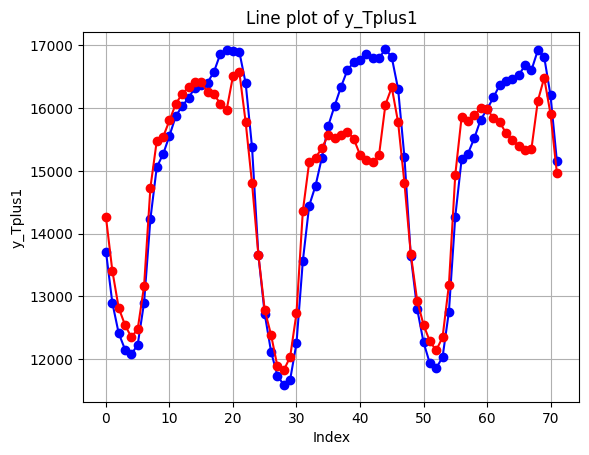

In [5]:
k = 24*3
x_ax = np.arange(k)

plt.plot(x_ax, results_aep_fourier_w_matrix_gru['y_hat'][:k], marker="o", linestyle="-", color="b")
plt.plot(x_ax, results_aep_fourier_w_matrix_gru['y'][:k], marker="o", linestyle="-", color="r")
plt.xlabel("Index")
plt.ylabel("y_Tplus1")
plt.title("Line plot of y_Tplus1")
plt.grid(True)
plt.show()

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_asym_feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_asy_con = pd.concat([results_aep_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_asy_con.to_csv(out_dir + '/results_aep_asy_con.csv', index=False)

1
epoch 1 loss: 0.843499481678009
epoch 2 loss: 0.6137679219245911
epoch 3 loss: 0.3631959557533264
epoch 4 loss: 0.26193296909332275
epoch 5 loss: 0.22270193696022034
epoch 6 loss: 0.2109493911266327
epoch 7 loss: 0.19311872124671936
epoch 8 loss: 0.19898222386837006
epoch 9 loss: 0.17515374720096588
epoch 10 loss: 0.17962010204792023
2


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_90350/3290770879.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_asy_con = pd.concat([results_aep_asy_con, result]).reset_index(drop=True)


epoch 1 loss: 0.8709108233451843
epoch 2 loss: 0.5882691740989685
epoch 3 loss: 0.26602426171302795
epoch 4 loss: 0.18810944259166718
epoch 5 loss: 0.2501952648162842
epoch 6 loss: 0.20993615686893463
epoch 7 loss: 0.21392302215099335
epoch 8 loss: 0.2036062330007553
epoch 9 loss: 0.2183883935213089
epoch 10 loss: 0.17008648812770844
3
epoch 1 loss: 0.7883762717247009
epoch 2 loss: 0.6203092932701111
epoch 3 loss: 0.38305506110191345
epoch 4 loss: 0.25954315066337585
epoch 5 loss: 0.2062516212463379
epoch 6 loss: 0.19591347873210907
epoch 7 loss: 0.1750093549489975
epoch 8 loss: 0.19537052512168884
epoch 9 loss: 0.23730887472629547
epoch 10 loss: 0.17832441627979279
finish


In [8]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("cpu"))
results_arma_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2004-10-01 00:00:00')
date_end = pd.to_datetime('2008-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_aep.loc[(df_aep['ds'] >= date_start) & (df_aep['ds'] < date_end)].copy()
    model = model_class.RNN_ARMA_Feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_arma_asy_con.to_csv(out_dir + '/results_arma_asy_con.csv', index=False)

1
epoch 1 loss: 1.0848135948181152
epoch 2 loss: 0.8289082050323486
epoch 3 loss: 0.5471181273460388
epoch 4 loss: 0.3092515170574188
epoch 5 loss: 0.2255319207906723
epoch 6 loss: 0.20444394648075104
epoch 7 loss: 0.20347830653190613
epoch 8 loss: 0.19901487231254578
epoch 9 loss: 0.18264152109622955
epoch 10 loss: 0.17185232043266296
epoch 11 loss: 0.18201546370983124
epoch 12 loss: 0.19392389059066772
epoch 13 loss: 0.19880421459674835
epoch 14 loss: 0.2136233001947403
epoch 15 loss: 0.22045555710792542
epoch 16 loss: 0.2065289467573166
epoch 17 loss: 0.18171022832393646
epoch 18 loss: 0.20525896549224854
epoch 19 loss: 0.20475207269191742
epoch 20 loss: 0.1908627599477768
epoch 21 loss: 0.18000002205371857
epoch 22 loss: 0.16746078431606293
epoch 23 loss: 0.20252200961112976
epoch 24 loss: 0.17895463109016418
epoch 25 loss: 0.1951626092195511
epoch 26 loss: 0.20337796211242676
epoch 27 loss: 0.20773832499980927
epoch 28 loss: 0.19920021295547485
epoch 29 loss: 0.2096223086118698
ep

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_92021/753006187.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)


epoch 1 loss: 0.7937965989112854
epoch 2 loss: 0.7392899990081787
epoch 3 loss: 0.4693567752838135
epoch 4 loss: 0.3668544590473175
epoch 5 loss: 0.3165898323059082
epoch 6 loss: 0.21177078783512115
epoch 7 loss: 0.2524019777774811
epoch 8 loss: 0.21147876977920532
epoch 9 loss: 0.24370695650577545
epoch 10 loss: 0.15603190660476685
epoch 11 loss: 0.20825667679309845
epoch 12 loss: 0.1745002120733261
epoch 13 loss: 0.19807398319244385
epoch 14 loss: 0.1844349205493927
epoch 15 loss: 0.1742566078901291
epoch 16 loss: 0.1576041579246521
epoch 17 loss: 0.1681801676750183
epoch 18 loss: 0.2171725034713745
epoch 19 loss: 0.19856038689613342
epoch 20 loss: 0.17577944695949554
epoch 21 loss: 0.17505770921707153
epoch 22 loss: 0.17071223258972168
epoch 23 loss: 0.1970372349023819
epoch 24 loss: 0.2048713117837906
epoch 25 loss: 0.1909770369529724
epoch 26 loss: 0.18660518527030945
epoch 27 loss: 0.20314301550388336
epoch 28 loss: 0.18595866858959198
epoch 29 loss: 0.2032654732465744
epoch 30 l

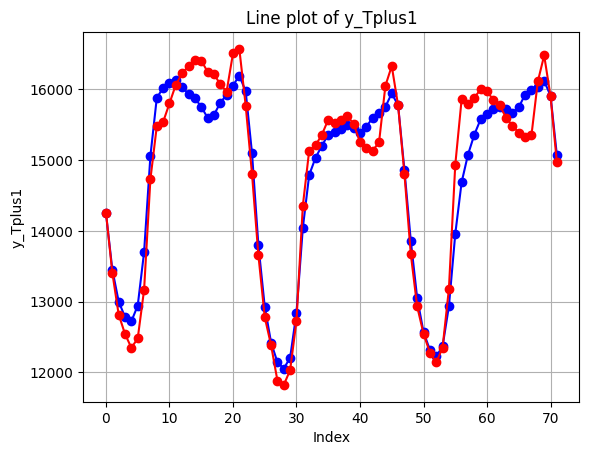

In [9]:
k = 24*3
x_ax = np.arange(len(results_arma_asy_con['y'][:k]))

plt.plot(x_ax, results_arma_asy_con['y_hat'][:k], marker="o", linestyle="-", color="b")
plt.plot(x_ax, results_arma_asy_con['y'][:k], marker="o", linestyle="-", color="r")
plt.xlabel("Index")
plt.ylabel("y_Tplus1")
plt.title("Line plot of y_Tplus1")
plt.grid(True)
plt.show()

## Comed

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import model_summary as model_class
import prophet_linear_adjust as prophet_based

%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_comed = pd.read_csv("COMED_hourly.csv")
df_comed.rename(columns={'Datetime': 'ds', 'COMED_MW': 'y'}, inplace=True)
df_comed['ds'] = pd.to_datetime(df_comed['ds'], format='%Y-%m-%d %H:%M:%S')

out_dir = 'Comed_results'

### test prophet based without seasonality

In [3]:
daily_demand_comed = df_comed.groupby(df_comed['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

results_prophet = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_comed, date_start, date_end, daily_demand_comed, manual = False, daily = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet = pd.concat(results_prophet, ignore_index=True)

results_prophet.to_csv(out_dir + '/results_prophet.csv', index=False)

fit model 2016-10-02 00:00:00


12:49:27 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-03 00:00:00


12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-04 00:00:00


12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-05 00:00:00


12:49:51 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-06 00:00:00


12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-07 00:00:00


12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-08 00:00:00


12:50:11 - cmdstanpy - INFO - Chain [1] start processing
12:50:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-09 00:00:00


12:50:18 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-10 00:00:00


12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-11 00:00:00


12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-12 00:00:00


12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-13 00:00:00


12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-14 00:00:00


12:50:51 - cmdstanpy - INFO - Chain [1] start processing
12:50:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-15 00:00:00


12:50:59 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-16 00:00:00


12:51:08 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-17 00:00:00


12:51:17 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-18 00:00:00


12:51:25 - cmdstanpy - INFO - Chain [1] start processing
12:51:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-19 00:00:00


12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-20 00:00:00


12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-21 00:00:00


12:51:51 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-22 00:00:00


12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:04 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-23 00:00:00


12:52:05 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-24 00:00:00


12:52:13 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-25 00:00:00


12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-26 00:00:00


12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-27 00:00:00


12:52:40 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-28 00:00:00


12:52:47 - cmdstanpy - INFO - Chain [1] start processing
12:52:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-29 00:00:00


12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:53:04 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-30 00:00:00


12:53:05 - cmdstanpy - INFO - Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-31 00:00:00


12:53:15 - cmdstanpy - INFO - Chain [1] start processing
12:53:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-01 00:00:00


12:53:24 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-02 00:00:00


12:53:32 - cmdstanpy - INFO - Chain [1] start processing
12:53:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-03 00:00:00


12:53:37 - cmdstanpy - INFO - Chain [1] start processing
12:53:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-04 00:00:00


12:53:46 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-05 00:00:00


12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-06 00:00:00


12:54:03 - cmdstanpy - INFO - Chain [1] start processing
12:54:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-07 00:00:00


12:54:11 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-08 00:00:00


12:54:18 - cmdstanpy - INFO - Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-09 00:00:00


12:54:24 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-10 00:00:00


12:54:31 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-11 00:00:00


12:54:37 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-12 00:00:00


12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-13 00:00:00


12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-14 00:00:00


12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-15 00:00:00


12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-16 00:00:00


12:55:10 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-17 00:00:00


12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-18 00:00:00


12:55:23 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-19 00:00:00


12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-20 00:00:00


12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-21 00:00:00


12:55:44 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-22 00:00:00


12:55:52 - cmdstanpy - INFO - Chain [1] start processing
12:56:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-23 00:00:00


12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-24 00:00:00


12:56:07 - cmdstanpy - INFO - Chain [1] start processing
12:56:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-25 00:00:00


12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-26 00:00:00


12:56:20 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-27 00:00:00


12:56:25 - cmdstanpy - INFO - Chain [1] start processing
12:56:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-28 00:00:00


12:56:31 - cmdstanpy - INFO - Chain [1] start processing
12:56:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-29 00:00:00


12:56:35 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-30 00:00:00


12:56:42 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-01 00:00:00


12:56:49 - cmdstanpy - INFO - Chain [1] start processing
12:56:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-02 00:00:00


12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-03 00:00:00


12:56:59 - cmdstanpy - INFO - Chain [1] start processing
12:57:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-04 00:00:00


12:57:07 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-05 00:00:00


12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-06 00:00:00


12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-07 00:00:00


12:57:26 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-08 00:00:00


12:57:34 - cmdstanpy - INFO - Chain [1] start processing
12:57:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-09 00:00:00


12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-10 00:00:00


12:57:51 - cmdstanpy - INFO - Chain [1] start processing
12:57:59 - cmdstanpy - INFO - Chain [1] done processing


### test prophet based with weekly seasonality

In [4]:
daily_demand_comed = df_comed.groupby(df_comed['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

results_prophet_w = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_comed, date_start, date_end, daily_demand_comed, manual = False, daily = True, weekly = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet_w.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet_w = pd.concat(results_prophet_w, ignore_index=True)

results_prophet_w.to_csv(out_dir + '/results_prophet_w.csv', index=False)

fit model 2016-10-02 00:00:00


12:58:01 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-03 00:00:00


12:58:13 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-04 00:00:00


12:58:23 - cmdstanpy - INFO - Chain [1] start processing
12:58:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-05 00:00:00


12:58:32 - cmdstanpy - INFO - Chain [1] start processing
12:58:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-06 00:00:00


12:58:40 - cmdstanpy - INFO - Chain [1] start processing
12:58:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-07 00:00:00


12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-08 00:00:00


12:58:56 - cmdstanpy - INFO - Chain [1] start processing
12:59:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-09 00:00:00


12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-10 00:00:00


12:59:11 - cmdstanpy - INFO - Chain [1] start processing
12:59:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-11 00:00:00


12:59:20 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-12 00:00:00


12:59:28 - cmdstanpy - INFO - Chain [1] start processing
12:59:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-13 00:00:00


12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-14 00:00:00


12:59:44 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-15 00:00:00


12:59:52 - cmdstanpy - INFO - Chain [1] start processing
13:00:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-16 00:00:00


13:00:01 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-17 00:00:00


13:00:09 - cmdstanpy - INFO - Chain [1] start processing
13:00:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-18 00:00:00


13:00:17 - cmdstanpy - INFO - Chain [1] start processing
13:00:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-19 00:00:00


13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-20 00:00:00


13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-21 00:00:00


13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-22 00:00:00


13:00:48 - cmdstanpy - INFO - Chain [1] start processing
13:00:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-23 00:00:00


13:00:57 - cmdstanpy - INFO - Chain [1] start processing
13:01:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-24 00:00:00


13:01:06 - cmdstanpy - INFO - Chain [1] start processing
13:01:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-25 00:00:00


13:01:16 - cmdstanpy - INFO - Chain [1] start processing
13:01:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-26 00:00:00


13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-27 00:00:00


13:01:32 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-28 00:00:00


13:01:41 - cmdstanpy - INFO - Chain [1] start processing
13:01:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-29 00:00:00


13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:02:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-30 00:00:00


13:02:02 - cmdstanpy - INFO - Chain [1] start processing
13:02:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-31 00:00:00


13:02:10 - cmdstanpy - INFO - Chain [1] start processing
13:02:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-01 00:00:00


13:02:18 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-02 00:00:00


13:02:25 - cmdstanpy - INFO - Chain [1] start processing
13:02:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-03 00:00:00


13:02:33 - cmdstanpy - INFO - Chain [1] start processing
13:02:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-04 00:00:00


13:02:40 - cmdstanpy - INFO - Chain [1] start processing
13:02:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-05 00:00:00


13:02:48 - cmdstanpy - INFO - Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-06 00:00:00


13:02:56 - cmdstanpy - INFO - Chain [1] start processing
13:03:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-07 00:00:00


13:03:02 - cmdstanpy - INFO - Chain [1] start processing
13:03:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-08 00:00:00


13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-09 00:00:00


13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:24 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-10 00:00:00


13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-11 00:00:00


13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-12 00:00:00


13:03:42 - cmdstanpy - INFO - Chain [1] start processing
13:03:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-13 00:00:00


13:03:50 - cmdstanpy - INFO - Chain [1] start processing
13:03:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-14 00:00:00


13:03:57 - cmdstanpy - INFO - Chain [1] start processing
13:04:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-15 00:00:00


13:04:06 - cmdstanpy - INFO - Chain [1] start processing
13:04:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-16 00:00:00


13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-17 00:00:00


13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-18 00:00:00


13:04:30 - cmdstanpy - INFO - Chain [1] start processing
13:04:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-19 00:00:00


13:04:38 - cmdstanpy - INFO - Chain [1] start processing
13:04:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-20 00:00:00


13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-21 00:00:00


13:04:53 - cmdstanpy - INFO - Chain [1] start processing
13:04:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-22 00:00:00


13:04:59 - cmdstanpy - INFO - Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-23 00:00:00


13:05:06 - cmdstanpy - INFO - Chain [1] start processing
13:05:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-24 00:00:00


13:05:13 - cmdstanpy - INFO - Chain [1] start processing
13:05:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-25 00:00:00


13:05:19 - cmdstanpy - INFO - Chain [1] start processing
13:05:27 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-26 00:00:00


13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:05:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-27 00:00:00


13:05:33 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-28 00:00:00


13:05:40 - cmdstanpy - INFO - Chain [1] start processing
13:05:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-29 00:00:00


13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:05:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-30 00:00:00


13:05:53 - cmdstanpy - INFO - Chain [1] start processing
13:05:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-01 00:00:00


13:05:59 - cmdstanpy - INFO - Chain [1] start processing
13:06:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-02 00:00:00


13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-03 00:00:00


13:06:12 - cmdstanpy - INFO - Chain [1] start processing
13:06:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-04 00:00:00


13:06:19 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-05 00:00:00


13:06:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-06 00:00:00


13:06:37 - cmdstanpy - INFO - Chain [1] start processing
13:06:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-07 00:00:00


13:06:46 - cmdstanpy - INFO - Chain [1] start processing
13:06:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-08 00:00:00


13:06:55 - cmdstanpy - INFO - Chain [1] start processing
13:07:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-09 00:00:00


13:07:04 - cmdstanpy - INFO - Chain [1] start processing
13:07:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-10 00:00:00


13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing


### test RNN+self convolution

In [14]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con.to_csv(out_dir + '/results_aep_self_con.csv', index=False)

1
epoch 1 loss: 0.7224190831184387
epoch 2 loss: 1.0079119205474854
epoch 3 loss: 0.8181241154670715
epoch 4 loss: 0.42989909648895264
epoch 5 loss: 0.2359398752450943
epoch 6 loss: 0.1516084372997284
epoch 7 loss: 0.15498685836791992
epoch 8 loss: 0.11114595830440521
epoch 9 loss: 0.1274639368057251
epoch 10 loss: 0.10806287080049515
epoch 11 loss: 0.10129054635763168
epoch 12 loss: 0.10762539505958557
epoch 13 loss: 0.1259184032678604
epoch 14 loss: 0.11505265533924103
epoch 15 loss: 0.07783318310976028
epoch 16 loss: 0.11646763980388641
epoch 17 loss: 0.06786362081766129
epoch 18 loss: 0.1013534665107727
epoch 19 loss: 0.10002484917640686
epoch 20 loss: 0.07774552702903748
epoch 21 loss: 0.08645369857549667
epoch 22 loss: 0.0798366442322731
epoch 23 loss: 0.06444624066352844
epoch 24 loss: 0.09933337569236755
epoch 25 loss: 0.07381157577037811
epoch 26 loss: 0.09330100566148758
epoch 27 loss: 0.09152530878782272
epoch 28 loss: 0.07226663082838058
epoch 29 loss: 0.08064039051532745
e

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_60650/1895582977.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)


epoch 1 loss: 0.839419960975647
epoch 2 loss: 0.5242214202880859
epoch 3 loss: 0.29251426458358765
epoch 4 loss: 0.230041965842247
epoch 5 loss: 0.22204993665218353
epoch 6 loss: 0.15605825185775757
epoch 7 loss: 0.1479824036359787
epoch 8 loss: 0.13960663974285126
epoch 9 loss: 0.13316573202610016
epoch 10 loss: 0.134592667222023
epoch 11 loss: 0.14441342651844025
epoch 12 loss: 0.10419359058141708
epoch 13 loss: 0.10747342556715012
epoch 14 loss: 0.1368257850408554
epoch 15 loss: 0.13046681880950928
epoch 16 loss: 0.08427700400352478
epoch 17 loss: 0.07936172187328339
epoch 18 loss: 0.13292406499385834
epoch 19 loss: 0.09054283052682877
epoch 20 loss: 0.08990401774644852
epoch 21 loss: 0.08795175701379776
epoch 22 loss: 0.13544891774654388
epoch 23 loss: 0.07927411794662476
epoch 24 loss: 0.07247035205364227
epoch 25 loss: 0.07294826954603195
epoch 26 loss: 0.10418640077114105
epoch 27 loss: 0.07726743817329407
epoch 28 loss: 0.0793791264295578
epoch 29 loss: 0.07603930681943893
epoc

### test RNN+self convolution + numerical weekday

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wn = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wn()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wn = pd.concat([results_aep_self_con_wn, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con_wn.to_csv(out_dir + '/results_aep_self_con_wn.csv', index=False)

### test RNN+self convolution + categorical weekday

In [16]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wc = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wc()
    trainer = model_class.RNN_train_2(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1
results_aep_self_con_wc.to_csv(out_dir + '/results_aep_self_con_wc.csv', index=False)

1
epoch 1 loss: 0.8390329480171204
epoch 2 loss: 0.6036105155944824
epoch 3 loss: 0.24438445270061493
epoch 4 loss: 0.14826078712940216
epoch 5 loss: 0.14974439144134521
epoch 6 loss: 0.12507973611354828
epoch 7 loss: 0.09557902812957764
epoch 8 loss: 0.09335751086473465
epoch 9 loss: 0.086921326816082
epoch 10 loss: 0.07268732041120529
epoch 11 loss: 0.05933845043182373
epoch 12 loss: 0.09224571287631989
epoch 13 loss: 0.0940682664513588
epoch 14 loss: 0.06109781563282013
epoch 15 loss: 0.059888508170843124
epoch 16 loss: 0.05162273719906807
epoch 17 loss: 0.08831685036420822
epoch 18 loss: 0.08742289990186691
epoch 19 loss: 0.07060473412275314
epoch 20 loss: 0.050168536603450775
epoch 21 loss: 0.06504275649785995
epoch 22 loss: 0.05612599849700928
epoch 23 loss: 0.06670321524143219
epoch 24 loss: 0.056243401020765305
epoch 25 loss: 0.058176249265670776
epoch 26 loss: 0.06523808091878891
epoch 27 loss: 0.05867001786828041
epoch 28 loss: 0.05840415507555008
epoch 29 loss: 0.04432875663

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_60650/4061239959.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)


epoch 1 loss: 1.0410021543502808
epoch 2 loss: 0.6607019901275635
epoch 3 loss: 0.1842181235551834
epoch 4 loss: 0.19811159372329712
epoch 5 loss: 0.15518803894519806
epoch 6 loss: 0.12503014504909515
epoch 7 loss: 0.13933658599853516
epoch 8 loss: 0.14219160377979279
epoch 9 loss: 0.10398723185062408
epoch 10 loss: 0.11738032847642899
epoch 11 loss: 0.09693284332752228
epoch 12 loss: 0.0697757825255394
epoch 13 loss: 0.08096786588430405
epoch 14 loss: 0.07483503222465515
epoch 15 loss: 0.13574755191802979
epoch 16 loss: 0.06989134848117828
epoch 17 loss: 0.11578453332185745
epoch 18 loss: 0.06152272969484329
epoch 19 loss: 0.05797957628965378
epoch 20 loss: 0.06196713447570801
epoch 21 loss: 0.07481169700622559
epoch 22 loss: 0.05432567372918129
epoch 23 loss: 0.07811460644006729
epoch 24 loss: 0.061234086751937866
epoch 25 loss: 0.045783936977386475
epoch 26 loss: 0.061963919550180435
epoch 27 loss: 0.07013934850692749
epoch 28 loss: 0.10022807866334915
epoch 29 loss: 0.0686672553420

### test RNN+self convolution + fourier vector (only weekly)

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="vector", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w = pd.concat([results_aep_fourier_w, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w.to_csv(out_dir + '/results_aep_fourier_w.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:921: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep+1} loss: {float(loss):.4f}")


epoch 1 loss: 0.7756
epoch 2 loss: 0.8179
epoch 3 loss: 0.5464
epoch 4 loss: 0.6245
epoch 5 loss: 0.4803
epoch 6 loss: 0.4608
epoch 7 loss: 0.3190
epoch 8 loss: 0.2122
epoch 9 loss: 0.1944
epoch 10 loss: 0.1791
epoch 11 loss: 0.1082
epoch 12 loss: 0.1191
epoch 13 loss: 0.1384
epoch 14 loss: 0.1034
epoch 15 loss: 0.1078
epoch 16 loss: 0.0844
epoch 17 loss: 0.0896
epoch 18 loss: 0.0931
epoch 19 loss: 0.1043
epoch 20 loss: 0.1207
epoch 21 loss: 0.1167
epoch 22 loss: 0.0946
epoch 23 loss: 0.0688
epoch 24 loss: 0.0654
epoch 25 loss: 0.0778
epoch 26 loss: 0.0949
epoch 27 loss: 0.0735
epoch 28 loss: 0.0803
epoch 29 loss: 0.0945
epoch 30 loss: 0.0833
2


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_70708/4267778447.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w = pd.concat([results_aep_fourier_w, result]).reset_index(drop=True)


epoch 1 loss: 0.6065
epoch 2 loss: 0.5725
epoch 3 loss: 0.3128
epoch 4 loss: 0.3577
epoch 5 loss: 0.2434
epoch 6 loss: 0.1692
epoch 7 loss: 0.1034
epoch 8 loss: 0.1557
epoch 9 loss: 0.0917
epoch 10 loss: 0.1231
epoch 11 loss: 0.1004
epoch 12 loss: 0.1010
epoch 13 loss: 0.0746
epoch 14 loss: 0.0788
epoch 15 loss: 0.0758
epoch 16 loss: 0.0782
epoch 17 loss: 0.0670
epoch 18 loss: 0.0795
epoch 19 loss: 0.0749
epoch 20 loss: 0.0618
epoch 21 loss: 0.0522
epoch 22 loss: 0.0788
epoch 23 loss: 0.0701
epoch 24 loss: 0.0471
epoch 25 loss: 0.0750
epoch 26 loss: 0.0759
epoch 27 loss: 0.0639
epoch 28 loss: 0.0513
epoch 29 loss: 0.0496
epoch 30 loss: 0.1086
3
epoch 1 loss: 0.7695
epoch 2 loss: 0.6359
epoch 3 loss: 0.6801
epoch 4 loss: 0.5313
epoch 5 loss: 0.4580
epoch 6 loss: 0.4784
epoch 7 loss: 0.2628
epoch 8 loss: 0.2028
epoch 9 loss: 0.1803
epoch 10 loss: 0.1816
epoch 11 loss: 0.2023
epoch 12 loss: 0.2003
epoch 13 loss: 0.1987
epoch 14 loss: 0.2012
epoch 15 loss: 0.1991
epoch 16 loss: 0.2043
epoc

### test RNN+self convolution + fourier matrix (only weekly)

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_w_matrix.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:921: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep+1} loss: {float(loss):.4f}")


epoch 1 loss: 0.6016
epoch 2 loss: 0.6518
epoch 3 loss: 0.6378
epoch 4 loss: 0.4070
epoch 5 loss: 0.5423
epoch 6 loss: 0.5118
epoch 7 loss: 0.2526
epoch 8 loss: 0.1710
epoch 9 loss: 0.1503
epoch 10 loss: 0.1233
epoch 11 loss: 0.1166
epoch 12 loss: 0.0804
epoch 13 loss: 0.1033
epoch 14 loss: 0.0790
epoch 15 loss: 0.0711
epoch 16 loss: 0.0638
epoch 17 loss: 0.0647
epoch 18 loss: 0.0517
epoch 19 loss: 0.0681
epoch 20 loss: 0.0623
epoch 21 loss: 0.0598
epoch 22 loss: 0.0438
epoch 23 loss: 0.0534
epoch 24 loss: 0.0766
epoch 25 loss: 0.0634
epoch 26 loss: 0.0605
epoch 27 loss: 0.0719
epoch 28 loss: 0.0507
epoch 29 loss: 0.0421
epoch 30 loss: 0.0519
2


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_73156/2516605468.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)


epoch 1 loss: 0.8241
epoch 2 loss: 0.6998
epoch 3 loss: 0.4530
epoch 4 loss: 0.4092
epoch 5 loss: 0.2103
epoch 6 loss: 0.1481
epoch 7 loss: 0.1401
epoch 8 loss: 0.1049
epoch 9 loss: 0.0946
epoch 10 loss: 0.1266
epoch 11 loss: 0.1329
epoch 12 loss: 0.0940
epoch 13 loss: 0.1410
epoch 14 loss: 0.0698
epoch 15 loss: 0.0900
epoch 16 loss: 0.0963
epoch 17 loss: 0.0477
epoch 18 loss: 0.1011
epoch 19 loss: 0.0814
epoch 20 loss: 0.0708
epoch 21 loss: 0.0641
epoch 22 loss: 0.0814
epoch 23 loss: 0.0809
epoch 24 loss: 0.0621
epoch 25 loss: 0.0817
epoch 26 loss: 0.1255
epoch 27 loss: 0.1574
epoch 28 loss: 0.0770
epoch 29 loss: 0.0785
epoch 30 loss: 0.0611
3
epoch 1 loss: 0.7749
epoch 2 loss: 0.7894
epoch 3 loss: 0.4179
epoch 4 loss: 0.3142
epoch 5 loss: 0.1596
epoch 6 loss: 0.1598
epoch 7 loss: 0.1232
epoch 8 loss: 0.1307
epoch 9 loss: 0.1361
epoch 10 loss: 0.0895
epoch 11 loss: 0.0861
epoch 12 loss: 0.0704
epoch 13 loss: 0.1311
epoch 14 loss: 0.0850
epoch 15 loss: 0.1124
epoch 16 loss: 0.0803
epoc

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=6, K_yearly=10)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly + fourier_conf.K_yearly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs

results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4,
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_kw3_km6_ky10_matrix.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1149: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep+1} loss: {float(loss):.4f}")


epoch 1 loss: 0.7318
epoch 2 loss: 0.7618
epoch 3 loss: 0.2973
epoch 4 loss: 0.2207
epoch 5 loss: 0.1220
epoch 6 loss: 0.0872
epoch 7 loss: 0.0832
epoch 8 loss: 0.0541
epoch 9 loss: 0.0669
epoch 10 loss: 0.0568
epoch 11 loss: 0.0574
epoch 12 loss: 0.0434
epoch 13 loss: 0.0529
epoch 14 loss: 0.0541
epoch 15 loss: 0.0407
epoch 16 loss: 0.0426
epoch 17 loss: 0.0381
epoch 18 loss: 0.0454
epoch 19 loss: 0.0297
epoch 20 loss: 0.0332
epoch 21 loss: 0.0386
epoch 22 loss: 0.0353
epoch 23 loss: 0.0444
epoch 24 loss: 0.0390
epoch 25 loss: 0.0257
epoch 26 loss: 0.0337
epoch 27 loss: 0.0288
epoch 28 loss: 0.0365
epoch 29 loss: 0.0308
epoch 30 loss: 0.0258
2


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_35858/291482010.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)


epoch 1 loss: 0.7625
epoch 2 loss: 0.5450
epoch 3 loss: 0.5818
epoch 4 loss: 0.3141
epoch 5 loss: 0.2066
epoch 6 loss: 0.1066
epoch 7 loss: 0.0603
epoch 8 loss: 0.0490
epoch 9 loss: 0.0436
epoch 10 loss: 0.0433
epoch 11 loss: 0.0423
epoch 12 loss: 0.0420
epoch 13 loss: 0.0461
epoch 14 loss: 0.0327
epoch 15 loss: 0.0310
epoch 16 loss: 0.0308
epoch 17 loss: 0.0367
epoch 18 loss: 0.0355
epoch 19 loss: 0.0362
epoch 20 loss: 0.0308
epoch 21 loss: 0.0322
epoch 22 loss: 0.0333
epoch 23 loss: 0.0275
epoch 24 loss: 0.0342
epoch 25 loss: 0.0283
epoch 26 loss: 0.0288
epoch 27 loss: 0.0267
epoch 28 loss: 0.0260
epoch 29 loss: 0.0379
epoch 30 loss: 0.0303
3
epoch 1 loss: 0.8113
epoch 2 loss: 0.6777
epoch 3 loss: 0.4506
epoch 4 loss: 0.3018
epoch 5 loss: 0.2304
epoch 6 loss: 0.1295
epoch 7 loss: 0.0943
epoch 8 loss: 0.0800
epoch 9 loss: 0.0697
epoch 10 loss: 0.0551
epoch 11 loss: 0.0683
epoch 12 loss: 0.0383
epoch 13 loss: 0.0548
epoch 14 loss: 0.0506
epoch 15 loss: 0.0444
epoch 16 loss: 0.0470
epoc

### test RNN_based Asym

In [3]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_asym_feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_asy_con = pd.concat([results_aep_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_asy_con.to_csv(out_dir + '/results_aep_asy_con.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1098: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {epoch+1} loss:", float(loss))


epoch 1 loss: 0.8716088533401489
epoch 2 loss: 0.5656700134277344
epoch 3 loss: 0.2816126048564911
epoch 4 loss: 0.18627262115478516
epoch 5 loss: 0.1277090609073639
epoch 6 loss: 0.17016418278217316
epoch 7 loss: 0.19621028006076813
epoch 8 loss: 0.15606823563575745
epoch 9 loss: 0.12370668351650238
epoch 10 loss: 0.13687169551849365
epoch 11 loss: 0.11630795896053314
epoch 12 loss: 0.13793213665485382
epoch 13 loss: 0.1174502968788147
epoch 14 loss: 0.09193851053714752
epoch 15 loss: 0.10576235502958298
epoch 16 loss: 0.0884748324751854
epoch 17 loss: 0.07523579150438309
epoch 18 loss: 0.09537186473608017
epoch 19 loss: 0.07470802962779999
epoch 20 loss: 0.07857320457696915
epoch 21 loss: 0.07284165918827057
epoch 22 loss: 0.09372812509536743
epoch 23 loss: 0.07426580041646957
epoch 24 loss: 0.0773773044347763
epoch 25 loss: 0.07014121115207672
epoch 26 loss: 0.06971672922372818
epoch 27 loss: 0.08010360598564148
epoch 28 loss: 0.07375162094831467
epoch 29 loss: 0.09400392323732376
e

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_94343/1543808945.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_asy_con = pd.concat([results_aep_asy_con, result]).reset_index(drop=True)


epoch 1 loss: 0.9588718414306641
epoch 2 loss: 0.43228188157081604
epoch 3 loss: 0.3142145574092865
epoch 4 loss: 0.21514825522899628
epoch 5 loss: 0.159245103597641
epoch 6 loss: 0.15616479516029358
epoch 7 loss: 0.15222501754760742
epoch 8 loss: 0.1274441033601761
epoch 9 loss: 0.10940007120370865
epoch 10 loss: 0.14267919957637787
epoch 11 loss: 0.09964807331562042
epoch 12 loss: 0.12889045476913452
epoch 13 loss: 0.08514443039894104
epoch 14 loss: 0.11737193912267685
epoch 15 loss: 0.0958469808101654
epoch 16 loss: 0.08066171407699585
epoch 17 loss: 0.08790330588817596
epoch 18 loss: 0.11226285248994827
epoch 19 loss: 0.10864437371492386
epoch 20 loss: 0.070216104388237
epoch 21 loss: 0.09542708843946457
epoch 22 loss: 0.10567907989025116
epoch 23 loss: 0.08188700675964355
epoch 24 loss: 0.09222248941659927
epoch 25 loss: 0.07744976133108139
epoch 26 loss: 0.07560469210147858
epoch 27 loss: 0.09272344410419464
epoch 28 loss: 0.07512500137090683
epoch 29 loss: 0.07745170593261719
ep

In [4]:
out_dir

'Comed_results'

### Test RNN_based ARMA

In [3]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("cpu"))
results_arma_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_class.RNN_ARMA_Feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_arma_asy_con.to_csv(out_dir + '/results_arma_asy_con.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1098: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {epoch+1} loss:", float(loss))


epoch 1 loss: 1.096156358718872
epoch 2 loss: 0.6445624232292175
epoch 3 loss: 0.43184781074523926
epoch 4 loss: 0.3598690330982208
epoch 5 loss: 0.25350242853164673
epoch 6 loss: 0.12622109055519104
epoch 7 loss: 0.14301782846450806
epoch 8 loss: 0.1533171832561493
epoch 9 loss: 0.15587902069091797
epoch 10 loss: 0.11551857739686966
epoch 11 loss: 0.15973807871341705
epoch 12 loss: 0.10921464115381241
epoch 13 loss: 0.13086643815040588
epoch 14 loss: 0.1311923712491989
epoch 15 loss: 0.10647160559892654
epoch 16 loss: 0.09958404302597046
epoch 17 loss: 0.15009497106075287
epoch 18 loss: 0.13686031103134155
epoch 19 loss: 0.1073843315243721
epoch 20 loss: 0.08351626992225647
epoch 21 loss: 0.11221741884946823
epoch 22 loss: 0.14926302433013916
epoch 23 loss: 0.180104061961174
epoch 24 loss: 0.08796479552984238
epoch 25 loss: 0.11732230335474014
epoch 26 loss: 0.1523258090019226
epoch 27 loss: 0.14987215399742126
epoch 28 loss: 0.11375413089990616
epoch 29 loss: 0.10847536474466324
epoc

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_93068/420669042.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)


epoch 1 loss: 0.6989014148712158
epoch 2 loss: 0.7636798620223999
epoch 3 loss: 0.6333984136581421
epoch 4 loss: 0.2736952304840088
epoch 5 loss: 0.26033103466033936
epoch 6 loss: 0.26153627038002014
epoch 7 loss: 0.15889890491962433
epoch 8 loss: 0.1982525736093521
epoch 9 loss: 0.14516650140285492
epoch 10 loss: 0.13712523877620697
epoch 11 loss: 0.1461891531944275
epoch 12 loss: 0.14406828582286835
epoch 13 loss: 0.14261695742607117
epoch 14 loss: 0.11779559403657913
epoch 15 loss: 0.19249208271503448
epoch 16 loss: 0.11482765525579453
epoch 17 loss: 0.14036132395267487
epoch 18 loss: 0.14708976447582245
epoch 19 loss: 0.1392999291419983
epoch 20 loss: 0.10045023262500763
epoch 21 loss: 0.13224336504936218
epoch 22 loss: 0.1298610121011734
epoch 23 loss: 0.1333124339580536
epoch 24 loss: 0.16133582592010498
epoch 25 loss: 0.16351158916950226
epoch 26 loss: 0.1421343833208084
epoch 27 loss: 0.17865292727947235
epoch 28 loss: 0.12352576851844788
epoch 29 loss: 0.12006748467683792
epoc

### test Dirich

In [6]:
import model_dich

class Cfg: pass
cfg = Cfg()
cfg.device = "mps"
cfg.n_epochs = 90
cfg.lr = 5e-4
cfg.x_col = "x"
cfg.y_cols = [f"y_{i}" for i in range(24)]
cfg.T_hist = 32
cfg.batch_size = 64
cfg.test_ratio = 0.2
cfg.kl_coeff = 1.0


train_config = model_class.training_config(n_epochs = 3, device = torch.device("cpu"))
results_prob_dich = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_comed.loc[(df_comed['ds'] >= date_start) & (df_comed['ds'] < date_end)].copy()
    model = model_dich.DirichletComposerRNN(device=torch.device("cpu"))
    trainer = model_dich.RNN_train(model, cfg)
    ret = trainer(df_reduced)
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': ret['Y_pred'].flatten(), 'y': ret['Y_test'].flatten()})

    results_prob_dich = pd.concat([results_prob_dich, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_prob_dich.to_csv(out_dir + '/results_prob_dich_90epoch.csv', index=False)

1
[Epoch 001] loss=1.0702 recon=0.9303 kl=0.1400
[Epoch 002] loss=0.9483 recon=0.9464 kl=0.0019
[Epoch 003] loss=0.9297 recon=0.9294 kl=0.0002
[Epoch 004] loss=0.9247 recon=0.9245 kl=0.0002
[Epoch 005] loss=0.9286 recon=0.9283 kl=0.0004
[Epoch 006] loss=0.9334 recon=0.9333 kl=0.0002
[Epoch 007] loss=0.9247 recon=0.9241 kl=0.0006
[Epoch 008] loss=0.9194 recon=0.9191 kl=0.0003
[Epoch 009] loss=0.9282 recon=0.9281 kl=0.0002
[Epoch 010] loss=0.9294 recon=0.9289 kl=0.0005
[Epoch 011] loss=0.9349 recon=0.9346 kl=0.0003
[Epoch 012] loss=0.9354 recon=0.9349 kl=0.0004
[Epoch 013] loss=0.9190 recon=0.9185 kl=0.0005
[Epoch 014] loss=0.9227 recon=0.9221 kl=0.0006
[Epoch 015] loss=0.9263 recon=0.9255 kl=0.0008
[Epoch 016] loss=0.9289 recon=0.9286 kl=0.0003
[Epoch 017] loss=0.9252 recon=0.9245 kl=0.0007
[Epoch 018] loss=0.9251 recon=0.9246 kl=0.0005
[Epoch 019] loss=0.9473 recon=0.9466 kl=0.0007
[Epoch 020] loss=0.9483 recon=0.9481 kl=0.0002
[Epoch 021] loss=0.9282 recon=0.9274 kl=0.0009
[Epoch 022]

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_34746/540361106.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_prob_dich = pd.concat([results_prob_dich, result]).reset_index(drop=True)


[Epoch 001] loss=1.3480 recon=0.9291 kl=0.4189
[Epoch 002] loss=0.9318 recon=0.9280 kl=0.0038
[Epoch 003] loss=0.9355 recon=0.9351 kl=0.0003
[Epoch 004] loss=0.9239 recon=0.9237 kl=0.0002
[Epoch 005] loss=0.9379 recon=0.9378 kl=0.0002
[Epoch 006] loss=0.9190 recon=0.9188 kl=0.0001
[Epoch 007] loss=0.9273 recon=0.9270 kl=0.0003
[Epoch 008] loss=0.9449 recon=0.9447 kl=0.0003
[Epoch 009] loss=0.9207 recon=0.9198 kl=0.0009
[Epoch 010] loss=0.9349 recon=0.9347 kl=0.0002
[Epoch 011] loss=0.9334 recon=0.9331 kl=0.0003
[Epoch 012] loss=0.9285 recon=0.9280 kl=0.0004
[Epoch 013] loss=0.9212 recon=0.9209 kl=0.0003
[Epoch 014] loss=0.9331 recon=0.9327 kl=0.0005
[Epoch 015] loss=0.9286 recon=0.9284 kl=0.0002
[Epoch 016] loss=0.9334 recon=0.9329 kl=0.0005
[Epoch 017] loss=0.9385 recon=0.9382 kl=0.0004
[Epoch 018] loss=0.9268 recon=0.9262 kl=0.0005
[Epoch 019] loss=0.9196 recon=0.9194 kl=0.0002
[Epoch 020] loss=0.9595 recon=0.9588 kl=0.0007
[Epoch 021] loss=0.9332 recon=0.9329 kl=0.0003
[Epoch 022] l

In [5]:
out_dir

'Comed_results'

## DAYTON

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import model_summary as model_class
import prophet_linear_adjust as prophet_based

%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_dayton = pd.read_csv("DAYTON_hourly.csv")
df_dayton.rename(columns={'Datetime': 'ds', 'DAYTON_MW': 'y'}, inplace=True)
df_dayton['ds'] = pd.to_datetime(df_dayton['ds'], format='%Y-%m-%d %H:%M:%S')
out_dir = 'Dayton_results'

### test prophet based without seasonality

In [3]:
daily_demand_dayton = df_dayton.groupby(df_dayton['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

results_prophet = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_dayton, date_start, date_end, daily_demand_dayton, manual = False, daily = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet = pd.concat(results_prophet, ignore_index=True)

results_prophet.to_csv(out_dir + '/results_prophet.csv', index=False)

fit model 2016-10-02 00:00:00


20:08:45 - cmdstanpy - INFO - Chain [1] start processing
20:08:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-03 00:00:00


20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:09:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-04 00:00:00


20:09:02 - cmdstanpy - INFO - Chain [1] start processing
20:09:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-05 00:00:00


20:09:09 - cmdstanpy - INFO - Chain [1] start processing
20:09:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-06 00:00:00


20:09:16 - cmdstanpy - INFO - Chain [1] start processing
20:09:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-07 00:00:00


20:09:24 - cmdstanpy - INFO - Chain [1] start processing
20:09:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-08 00:00:00


20:09:29 - cmdstanpy - INFO - Chain [1] start processing
20:09:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-09 00:00:00


20:09:34 - cmdstanpy - INFO - Chain [1] start processing
20:09:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-10 00:00:00


20:09:40 - cmdstanpy - INFO - Chain [1] start processing
20:09:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-11 00:00:00


20:09:47 - cmdstanpy - INFO - Chain [1] start processing
20:09:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-12 00:00:00


20:09:53 - cmdstanpy - INFO - Chain [1] start processing
20:09:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-13 00:00:00


20:09:58 - cmdstanpy - INFO - Chain [1] start processing
20:10:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-14 00:00:00


20:10:05 - cmdstanpy - INFO - Chain [1] start processing
20:10:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-15 00:00:00


20:10:13 - cmdstanpy - INFO - Chain [1] start processing
20:10:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-16 00:00:00


20:10:22 - cmdstanpy - INFO - Chain [1] start processing
20:10:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-17 00:00:00


20:10:29 - cmdstanpy - INFO - Chain [1] start processing
20:10:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-18 00:00:00


20:10:37 - cmdstanpy - INFO - Chain [1] start processing
20:10:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-19 00:00:00


20:10:46 - cmdstanpy - INFO - Chain [1] start processing
20:10:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-20 00:00:00


20:10:55 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-21 00:00:00


20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-22 00:00:00


20:11:11 - cmdstanpy - INFO - Chain [1] start processing
20:11:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-23 00:00:00


20:11:19 - cmdstanpy - INFO - Chain [1] start processing
20:11:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-24 00:00:00


20:11:27 - cmdstanpy - INFO - Chain [1] start processing
20:11:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-25 00:00:00


20:11:34 - cmdstanpy - INFO - Chain [1] start processing
20:11:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-26 00:00:00


20:11:42 - cmdstanpy - INFO - Chain [1] start processing
20:11:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-27 00:00:00


20:11:51 - cmdstanpy - INFO - Chain [1] start processing
20:12:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-28 00:00:00


20:12:02 - cmdstanpy - INFO - Chain [1] start processing
20:12:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-29 00:00:00


20:12:09 - cmdstanpy - INFO - Chain [1] start processing
20:12:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-30 00:00:00


20:12:17 - cmdstanpy - INFO - Chain [1] start processing
20:12:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-31 00:00:00


20:12:24 - cmdstanpy - INFO - Chain [1] start processing
20:12:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-01 00:00:00


20:12:31 - cmdstanpy - INFO - Chain [1] start processing
20:12:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-02 00:00:00


20:12:42 - cmdstanpy - INFO - Chain [1] start processing
20:12:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-03 00:00:00


20:12:50 - cmdstanpy - INFO - Chain [1] start processing
20:12:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-04 00:00:00


20:12:59 - cmdstanpy - INFO - Chain [1] start processing
20:13:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-05 00:00:00


20:13:07 - cmdstanpy - INFO - Chain [1] start processing
20:13:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-06 00:00:00


20:13:16 - cmdstanpy - INFO - Chain [1] start processing
20:13:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-07 00:00:00


20:13:23 - cmdstanpy - INFO - Chain [1] start processing
20:13:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-08 00:00:00


20:13:30 - cmdstanpy - INFO - Chain [1] start processing
20:13:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-09 00:00:00


20:13:37 - cmdstanpy - INFO - Chain [1] start processing
20:13:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-10 00:00:00


20:13:45 - cmdstanpy - INFO - Chain [1] start processing
20:13:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-11 00:00:00


20:13:54 - cmdstanpy - INFO - Chain [1] start processing
20:14:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-12 00:00:00


20:14:04 - cmdstanpy - INFO - Chain [1] start processing
20:14:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-13 00:00:00


20:14:12 - cmdstanpy - INFO - Chain [1] start processing
20:14:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-14 00:00:00


20:14:21 - cmdstanpy - INFO - Chain [1] start processing
20:14:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-15 00:00:00


20:14:30 - cmdstanpy - INFO - Chain [1] start processing
20:14:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-16 00:00:00


20:14:37 - cmdstanpy - INFO - Chain [1] start processing
20:14:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-17 00:00:00


20:14:46 - cmdstanpy - INFO - Chain [1] start processing
20:14:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-18 00:00:00


20:14:53 - cmdstanpy - INFO - Chain [1] start processing
20:15:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-19 00:00:00


20:15:01 - cmdstanpy - INFO - Chain [1] start processing
20:15:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-20 00:00:00


20:15:07 - cmdstanpy - INFO - Chain [1] start processing
20:15:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-21 00:00:00


20:15:13 - cmdstanpy - INFO - Chain [1] start processing
20:15:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-22 00:00:00


20:15:18 - cmdstanpy - INFO - Chain [1] start processing
20:15:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-23 00:00:00


20:15:24 - cmdstanpy - INFO - Chain [1] start processing
20:15:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-24 00:00:00


20:15:30 - cmdstanpy - INFO - Chain [1] start processing
20:15:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-25 00:00:00


20:15:38 - cmdstanpy - INFO - Chain [1] start processing
20:15:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-26 00:00:00


20:15:44 - cmdstanpy - INFO - Chain [1] start processing
20:15:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-27 00:00:00


20:15:49 - cmdstanpy - INFO - Chain [1] start processing
20:15:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-28 00:00:00


20:15:56 - cmdstanpy - INFO - Chain [1] start processing
20:16:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-29 00:00:00


20:16:01 - cmdstanpy - INFO - Chain [1] start processing
20:16:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-30 00:00:00


20:16:08 - cmdstanpy - INFO - Chain [1] start processing
20:16:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-01 00:00:00


20:16:14 - cmdstanpy - INFO - Chain [1] start processing
20:16:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-02 00:00:00


20:16:21 - cmdstanpy - INFO - Chain [1] start processing
20:16:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-03 00:00:00


20:16:27 - cmdstanpy - INFO - Chain [1] start processing
20:16:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-04 00:00:00


20:16:34 - cmdstanpy - INFO - Chain [1] start processing
20:16:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-05 00:00:00


20:16:40 - cmdstanpy - INFO - Chain [1] start processing
20:16:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-06 00:00:00


20:16:48 - cmdstanpy - INFO - Chain [1] start processing
20:16:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-07 00:00:00


20:16:55 - cmdstanpy - INFO - Chain [1] start processing
20:17:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-08 00:00:00


20:17:02 - cmdstanpy - INFO - Chain [1] start processing
20:17:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-09 00:00:00


20:17:09 - cmdstanpy - INFO - Chain [1] start processing
20:17:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-10 00:00:00


20:17:17 - cmdstanpy - INFO - Chain [1] start processing
20:17:22 - cmdstanpy - INFO - Chain [1] done processing


### test prophet based with seasonality

In [4]:
daily_demand_dayton = df_dayton.groupby(df_dayton['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

results_prophet_w = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_dayton, date_start, date_end, daily_demand_dayton, manual = False, daily = True, weekly = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet_w.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet_w = pd.concat(results_prophet_w, ignore_index=True)

results_prophet_w.to_csv(out_dir + '/results_prophet_w.csv', index=False)

fit model 2016-10-02 00:00:00


20:17:24 - cmdstanpy - INFO - Chain [1] start processing
20:17:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-03 00:00:00


20:17:35 - cmdstanpy - INFO - Chain [1] start processing
20:17:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-04 00:00:00


20:17:43 - cmdstanpy - INFO - Chain [1] start processing
20:17:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-05 00:00:00


20:17:52 - cmdstanpy - INFO - Chain [1] start processing
20:18:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-06 00:00:00


20:18:01 - cmdstanpy - INFO - Chain [1] start processing
20:18:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-07 00:00:00


20:18:08 - cmdstanpy - INFO - Chain [1] start processing
20:18:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-08 00:00:00


20:18:15 - cmdstanpy - INFO - Chain [1] start processing
20:18:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-09 00:00:00


20:18:23 - cmdstanpy - INFO - Chain [1] start processing
20:18:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-10 00:00:00


20:18:31 - cmdstanpy - INFO - Chain [1] start processing
20:18:37 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-11 00:00:00


20:18:39 - cmdstanpy - INFO - Chain [1] start processing
20:18:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-12 00:00:00


20:18:47 - cmdstanpy - INFO - Chain [1] start processing
20:18:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-13 00:00:00


20:18:55 - cmdstanpy - INFO - Chain [1] start processing
20:19:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-14 00:00:00


20:19:03 - cmdstanpy - INFO - Chain [1] start processing
20:19:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-15 00:00:00


20:19:10 - cmdstanpy - INFO - Chain [1] start processing
20:19:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-16 00:00:00


20:19:18 - cmdstanpy - INFO - Chain [1] start processing
20:19:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-17 00:00:00


20:19:26 - cmdstanpy - INFO - Chain [1] start processing
20:19:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-18 00:00:00


20:19:35 - cmdstanpy - INFO - Chain [1] start processing
20:19:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-19 00:00:00


20:19:44 - cmdstanpy - INFO - Chain [1] start processing
20:19:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-20 00:00:00


20:19:52 - cmdstanpy - INFO - Chain [1] start processing
20:19:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-21 00:00:00


20:19:59 - cmdstanpy - INFO - Chain [1] start processing
20:20:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-22 00:00:00


20:20:06 - cmdstanpy - INFO - Chain [1] start processing
20:20:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-23 00:00:00


20:20:12 - cmdstanpy - INFO - Chain [1] start processing
20:20:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-24 00:00:00


20:20:19 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-25 00:00:00


20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-26 00:00:00


20:20:35 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-27 00:00:00


20:20:45 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-28 00:00:00


20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-29 00:00:00


20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-30 00:00:00


20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-10-31 00:00:00


20:21:21 - cmdstanpy - INFO - Chain [1] start processing
20:21:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-01 00:00:00


20:21:31 - cmdstanpy - INFO - Chain [1] start processing
20:21:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-02 00:00:00


20:21:41 - cmdstanpy - INFO - Chain [1] start processing
20:21:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-03 00:00:00


20:21:53 - cmdstanpy - INFO - Chain [1] start processing
20:22:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-04 00:00:00


20:22:02 - cmdstanpy - INFO - Chain [1] start processing
20:22:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-05 00:00:00


20:22:12 - cmdstanpy - INFO - Chain [1] start processing
20:22:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-06 00:00:00


20:22:23 - cmdstanpy - INFO - Chain [1] start processing
20:22:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-07 00:00:00


20:22:31 - cmdstanpy - INFO - Chain [1] start processing
20:22:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-08 00:00:00


20:22:41 - cmdstanpy - INFO - Chain [1] start processing
20:22:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-09 00:00:00


20:22:49 - cmdstanpy - INFO - Chain [1] start processing
20:22:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-10 00:00:00


20:22:59 - cmdstanpy - INFO - Chain [1] start processing
20:23:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-11 00:00:00


20:23:10 - cmdstanpy - INFO - Chain [1] start processing
20:23:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-12 00:00:00


20:23:20 - cmdstanpy - INFO - Chain [1] start processing
20:23:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-13 00:00:00


20:23:30 - cmdstanpy - INFO - Chain [1] start processing
20:23:38 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-14 00:00:00


20:23:39 - cmdstanpy - INFO - Chain [1] start processing
20:23:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-15 00:00:00


20:23:48 - cmdstanpy - INFO - Chain [1] start processing
20:23:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-16 00:00:00


20:23:56 - cmdstanpy - INFO - Chain [1] start processing
20:24:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-17 00:00:00


20:24:03 - cmdstanpy - INFO - Chain [1] start processing
20:24:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-18 00:00:00


20:24:10 - cmdstanpy - INFO - Chain [1] start processing
20:24:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-19 00:00:00


20:24:18 - cmdstanpy - INFO - Chain [1] start processing
20:24:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-20 00:00:00


20:24:24 - cmdstanpy - INFO - Chain [1] start processing
20:24:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-21 00:00:00


20:24:32 - cmdstanpy - INFO - Chain [1] start processing
20:24:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-22 00:00:00


20:24:41 - cmdstanpy - INFO - Chain [1] start processing
20:24:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-23 00:00:00


20:24:46 - cmdstanpy - INFO - Chain [1] start processing
20:24:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-24 00:00:00


20:24:54 - cmdstanpy - INFO - Chain [1] start processing
20:25:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-25 00:00:00


20:25:01 - cmdstanpy - INFO - Chain [1] start processing
20:25:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-26 00:00:00


20:25:08 - cmdstanpy - INFO - Chain [1] start processing
20:25:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-27 00:00:00


20:25:15 - cmdstanpy - INFO - Chain [1] start processing
20:25:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-28 00:00:00


20:25:21 - cmdstanpy - INFO - Chain [1] start processing
20:25:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-29 00:00:00


20:25:27 - cmdstanpy - INFO - Chain [1] start processing
20:25:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-11-30 00:00:00


20:25:34 - cmdstanpy - INFO - Chain [1] start processing
20:25:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-01 00:00:00


20:25:40 - cmdstanpy - INFO - Chain [1] start processing
20:25:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-02 00:00:00


20:25:48 - cmdstanpy - INFO - Chain [1] start processing
20:25:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-03 00:00:00


20:25:57 - cmdstanpy - INFO - Chain [1] start processing
20:26:03 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-04 00:00:00


20:26:04 - cmdstanpy - INFO - Chain [1] start processing
20:26:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-05 00:00:00


20:26:12 - cmdstanpy - INFO - Chain [1] start processing
20:26:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-06 00:00:00


20:26:21 - cmdstanpy - INFO - Chain [1] start processing
20:26:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-07 00:00:00


20:26:30 - cmdstanpy - INFO - Chain [1] start processing
20:26:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-08 00:00:00


20:26:37 - cmdstanpy - INFO - Chain [1] start processing
20:26:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-09 00:00:00


20:26:46 - cmdstanpy - INFO - Chain [1] start processing
20:26:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2016-12-10 00:00:00


20:26:54 - cmdstanpy - INFO - Chain [1] start processing
20:27:02 - cmdstanpy - INFO - Chain [1] done processing


### test RNN+self convolution

In [3]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con.to_csv(out_dir + '/results_aep_self_con.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:853: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {epoch+1} loss:", float(loss))


epoch 1 loss: 0.939308226108551
epoch 2 loss: 0.5631309151649475
epoch 3 loss: 0.3834574520587921
epoch 4 loss: 0.21174007654190063
epoch 5 loss: 0.16203318536281586
epoch 6 loss: 0.19071727991104126
epoch 7 loss: 0.15068133175373077
epoch 8 loss: 0.15765677392482758
epoch 9 loss: 0.15446890890598297
epoch 10 loss: 0.20670722424983978
epoch 11 loss: 0.20862093567848206
epoch 12 loss: 0.16015109419822693
epoch 13 loss: 0.14782682061195374
epoch 14 loss: 0.125766783952713
epoch 15 loss: 0.1373230516910553
epoch 16 loss: 0.16150914132595062
epoch 17 loss: 0.1828644573688507
epoch 18 loss: 0.1745288223028183
epoch 19 loss: 0.16186682879924774
epoch 20 loss: 0.08814308047294617
epoch 21 loss: 0.15779729187488556
epoch 22 loss: 0.14702589809894562
epoch 23 loss: 0.12249288707971573
epoch 24 loss: 0.12337148189544678
epoch 25 loss: 0.11441438645124435
epoch 26 loss: 0.1085873618721962
epoch 27 loss: 0.121479831635952
epoch 28 loss: 0.10990456491708755
epoch 29 loss: 0.10412468016147614
epoch 

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_74380/3267305768.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)


epoch 1 loss: 0.891365647315979
epoch 2 loss: 0.7614630460739136
epoch 3 loss: 0.44481393694877625
epoch 4 loss: 0.2191857248544693
epoch 5 loss: 0.17499452829360962
epoch 6 loss: 0.17133350670337677
epoch 7 loss: 0.1735900193452835
epoch 8 loss: 0.14612078666687012
epoch 9 loss: 0.17285114526748657
epoch 10 loss: 0.1769193559885025
epoch 11 loss: 0.19641399383544922
epoch 12 loss: 0.13468602299690247
epoch 13 loss: 0.18551984429359436
epoch 14 loss: 0.16620787978172302
epoch 15 loss: 0.18450814485549927
epoch 16 loss: 0.15606112778186798
epoch 17 loss: 0.1650710552930832
epoch 18 loss: 0.19153423607349396
epoch 19 loss: 0.1653517186641693
epoch 20 loss: 0.13315559923648834
epoch 21 loss: 0.158402681350708
epoch 22 loss: 0.14619988203048706
epoch 23 loss: 0.1790519654750824
epoch 24 loss: 0.15698984265327454
epoch 25 loss: 0.15835532546043396
epoch 26 loss: 0.08529486507177353
epoch 27 loss: 0.12556567788124084
epoch 28 loss: 0.16067562997341156
epoch 29 loss: 0.12115822732448578
epoch

### test RNN+self convolution + numerical weekday

In [4]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wn = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wn()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wn = pd.concat([results_aep_self_con_wn, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con_wn.to_csv(out_dir + '/results_aep_self_con_wn.csv', index=False)

1
epoch 1 loss: 0.6841861009597778
epoch 2 loss: 0.5988009572029114
epoch 3 loss: 0.2329423874616623
epoch 4 loss: 0.18408723175525665
epoch 5 loss: 0.17501644790172577
epoch 6 loss: 0.15250727534294128
epoch 7 loss: 0.16848231852054596
epoch 8 loss: 0.16918827593326569
epoch 9 loss: 0.14645668864250183
epoch 10 loss: 0.15509141981601715
epoch 11 loss: 0.1391536295413971
epoch 12 loss: 0.18266505002975464
epoch 13 loss: 0.1422642320394516
epoch 14 loss: 0.16787512600421906
epoch 15 loss: 0.15880224108695984
epoch 16 loss: 0.185583233833313
epoch 17 loss: 0.1351071447134018
epoch 18 loss: 0.1505209058523178
epoch 19 loss: 0.16360563039779663
epoch 20 loss: 0.14969904720783234
epoch 21 loss: 0.14457431435585022
epoch 22 loss: 0.10642094910144806
epoch 23 loss: 0.1525767594575882
epoch 24 loss: 0.10663477331399918
epoch 25 loss: 0.10171978920698166
epoch 26 loss: 0.12593424320220947
epoch 27 loss: 0.12140392512083054
epoch 28 loss: 0.1121976375579834
epoch 29 loss: 0.13153794407844543
epo

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_74380/4088566383.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con_wn = pd.concat([results_aep_self_con_wn, result]).reset_index(drop=True)


epoch 1 loss: 0.8629924654960632
epoch 2 loss: 0.824164092540741
epoch 3 loss: 0.4823002517223358
epoch 4 loss: 0.18309421837329865
epoch 5 loss: 0.17974115908145905
epoch 6 loss: 0.1758941411972046
epoch 7 loss: 0.15091736614704132
epoch 8 loss: 0.15926307439804077
epoch 9 loss: 0.1398368924856186
epoch 10 loss: 0.1389441341161728
epoch 11 loss: 0.12791688740253448
epoch 12 loss: 0.14611530303955078
epoch 13 loss: 0.16228079795837402
epoch 14 loss: 0.1351272165775299
epoch 15 loss: 0.17304496467113495
epoch 16 loss: 0.1147528886795044
epoch 17 loss: 0.10164619237184525
epoch 18 loss: 0.14238737523555756
epoch 19 loss: 0.12427179515361786
epoch 20 loss: 0.11978431791067123
epoch 21 loss: 0.22159510850906372
epoch 22 loss: 0.16907761991024017
epoch 23 loss: 0.11241931468248367
epoch 24 loss: 0.13163064420223236
epoch 25 loss: 0.11044519394636154
epoch 26 loss: 0.10771441459655762
epoch 27 loss: 0.08891842514276505
epoch 28 loss: 0.10253387689590454
epoch 29 loss: 0.10507652163505554
epo

### test RNN+self convolution + categorical weekday

In [5]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wc = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wc()
    trainer = model_class.RNN_train_2(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1
results_aep_self_con_wc.to_csv(out_dir + '/results_aep_self_con_wc.csv', index=False)

1
epoch 1 loss: 0.8191321492195129
epoch 2 loss: 0.5870351195335388
epoch 3 loss: 0.38221508264541626
epoch 4 loss: 0.24898682534694672
epoch 5 loss: 0.18089719116687775
epoch 6 loss: 0.182883620262146
epoch 7 loss: 0.16006335616111755
epoch 8 loss: 0.1428573578596115
epoch 9 loss: 0.15570026636123657
epoch 10 loss: 0.1574164628982544
epoch 11 loss: 0.16987362504005432
epoch 12 loss: 0.15905995666980743
epoch 13 loss: 0.19655367732048035
epoch 14 loss: 0.1828727424144745
epoch 15 loss: 0.16033180058002472
epoch 16 loss: 0.17209362983703613
epoch 17 loss: 0.17336928844451904
epoch 18 loss: 0.16569817066192627
epoch 19 loss: 0.1268313229084015
epoch 20 loss: 0.14280572533607483
epoch 21 loss: 0.16921383142471313
epoch 22 loss: 0.13318413496017456
epoch 23 loss: 0.12118727713823318
epoch 24 loss: 0.09081951528787613
epoch 25 loss: 0.10585596412420273
epoch 26 loss: 0.09949834644794464
epoch 27 loss: 0.10542371869087219
epoch 28 loss: 0.1101817786693573
epoch 29 loss: 0.10610384494066238
e

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_74380/3578828895.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)


epoch 1 loss: 0.9077210426330566
epoch 2 loss: 0.5069284439086914
epoch 3 loss: 0.22441674768924713
epoch 4 loss: 0.18112707138061523
epoch 5 loss: 0.1811114251613617
epoch 6 loss: 0.15765829384326935
epoch 7 loss: 0.16533997654914856
epoch 8 loss: 0.17041465640068054
epoch 9 loss: 0.14592640101909637
epoch 10 loss: 0.12414997816085815
epoch 11 loss: 0.1581663191318512
epoch 12 loss: 0.1378629505634308
epoch 13 loss: 0.1478809267282486
epoch 14 loss: 0.16473138332366943
epoch 15 loss: 0.14138072729110718
epoch 16 loss: 0.15481819212436676
epoch 17 loss: 0.14232750236988068
epoch 18 loss: 0.14942342042922974
epoch 19 loss: 0.17991547286510468
epoch 20 loss: 0.11451659351587296
epoch 21 loss: 0.1302776038646698
epoch 22 loss: 0.08612099289894104
epoch 23 loss: 0.15715275704860687
epoch 24 loss: 0.13312265276908875
epoch 25 loss: 0.0933072492480278
epoch 26 loss: 0.1012747660279274
epoch 27 loss: 0.13144569098949432
epoch 28 loss: 0.12185546010732651
epoch 29 loss: 0.10005547106266022
epo

### test RNN+self convolution + fourier vector (only weekly)

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="vector", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w = pd.concat([results_aep_fourier_w, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w.to_csv(out_dir + '/results_aep_fourier_w.csv', index=False)

### test RNN+self convolution + fourier matrix (only weekly)

In [3]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_w_matrix.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:921: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep+1} loss: {float(loss):.4f}")


epoch 1 loss: 0.7729
epoch 2 loss: 0.5945
epoch 3 loss: 0.4687
epoch 4 loss: 0.2746
epoch 5 loss: 0.2250
epoch 6 loss: 0.1746
epoch 7 loss: 0.2098
epoch 8 loss: 0.1669
epoch 9 loss: 0.1898
epoch 10 loss: 0.1545
epoch 11 loss: 0.1768
epoch 12 loss: 0.1581
epoch 13 loss: 0.1501
epoch 14 loss: 0.1833
epoch 15 loss: 0.1395
epoch 16 loss: 0.1614
epoch 17 loss: 0.1394
epoch 18 loss: 0.1041
epoch 19 loss: 0.1545
epoch 20 loss: 0.1392
epoch 21 loss: 0.1692
epoch 22 loss: 0.1572
epoch 23 loss: 0.1426
epoch 24 loss: 0.1000
epoch 25 loss: 0.1357
epoch 26 loss: 0.1532
epoch 27 loss: 0.1533
epoch 28 loss: 0.1193
epoch 29 loss: 0.1108
epoch 30 loss: 0.1765
2


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_78663/661564195.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)


epoch 1 loss: 0.9912
epoch 2 loss: 0.7911
epoch 3 loss: 0.4966
epoch 4 loss: 0.3459
epoch 5 loss: 0.1888
epoch 6 loss: 0.2639
epoch 7 loss: 0.1748
epoch 8 loss: 0.1741
epoch 9 loss: 0.1915
epoch 10 loss: 0.1670
epoch 11 loss: 0.1430
epoch 12 loss: 0.1551
epoch 13 loss: 0.1708
epoch 14 loss: 0.1340
epoch 15 loss: 0.1432
epoch 16 loss: 0.1526
epoch 17 loss: 0.1558
epoch 18 loss: 0.1661
epoch 19 loss: 0.1683
epoch 20 loss: 0.1806
epoch 21 loss: 0.1673
epoch 22 loss: 0.1149
epoch 23 loss: 0.1268
epoch 24 loss: 0.1418
epoch 25 loss: 0.1670
epoch 26 loss: 0.1369
epoch 27 loss: 0.2370
epoch 28 loss: 0.1582
epoch 29 loss: 0.1617
epoch 30 loss: 0.1235
3
epoch 1 loss: 0.7367
epoch 2 loss: 0.5357
epoch 3 loss: 0.6606
epoch 4 loss: 0.4180
epoch 5 loss: 0.2952
epoch 6 loss: 0.1727
epoch 7 loss: 0.1720
epoch 8 loss: 0.1778
epoch 9 loss: 0.1843
epoch 10 loss: 0.2063
epoch 11 loss: 0.1235
epoch 12 loss: 0.1787
epoch 13 loss: 0.2195
epoch 14 loss: 0.1339
epoch 15 loss: 0.1324
epoch 16 loss: 0.1414
epoc

In [3]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=6, K_yearly=10)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly + fourier_conf.K_yearly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs

results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4,
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_kw3_km6_ky10_matrix.csv', index=False)

1


/Users/zero/Desktop/Downscaling/work_summary_9_26/model_summary.py:1149: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print(f"epoch {ep+1} loss: {float(loss):.4f}")


epoch 1 loss: 0.6757
epoch 2 loss: 0.4850
epoch 3 loss: 0.3936
epoch 4 loss: 0.3030
epoch 5 loss: 0.1951
epoch 6 loss: 0.0863
epoch 7 loss: 0.0612
epoch 8 loss: 0.0564
epoch 9 loss: 0.0531
epoch 10 loss: 0.0482
epoch 11 loss: 0.0427
epoch 12 loss: 0.0383
epoch 13 loss: 0.0404
epoch 14 loss: 0.0404
epoch 15 loss: 0.0415
epoch 16 loss: 0.0347
epoch 17 loss: 0.0378
epoch 18 loss: 0.0369
epoch 19 loss: 0.0382
epoch 20 loss: 0.0322
epoch 21 loss: 0.0367
epoch 22 loss: 0.0353
epoch 23 loss: 0.0301
epoch 24 loss: 0.0319
epoch 25 loss: 0.0314
epoch 26 loss: 0.0318
epoch 27 loss: 0.0348
epoch 28 loss: 0.0365
epoch 29 loss: 0.0353
epoch 30 loss: 0.0329
2


/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_37583/3620390467.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)


epoch 1 loss: 0.7547
epoch 2 loss: 0.4642
epoch 3 loss: 0.4170
epoch 4 loss: 0.2462
epoch 5 loss: 0.1129
epoch 6 loss: 0.1008
epoch 7 loss: 0.0744
epoch 8 loss: 0.0710
epoch 9 loss: 0.0698
epoch 10 loss: 0.0558
epoch 11 loss: 0.0656
epoch 12 loss: 0.0619
epoch 13 loss: 0.0538
epoch 14 loss: 0.0502
epoch 15 loss: 0.0492
epoch 16 loss: 0.0502
epoch 17 loss: 0.0499
epoch 18 loss: 0.0453
epoch 19 loss: 0.0433
epoch 20 loss: 0.0397
epoch 21 loss: 0.0386
epoch 22 loss: 0.0412
epoch 23 loss: 0.0397
epoch 24 loss: 0.0369
epoch 25 loss: 0.0389
epoch 26 loss: 0.0368
epoch 27 loss: 0.0355
epoch 28 loss: 0.0440
epoch 29 loss: 0.0371
epoch 30 loss: 0.0341
3
epoch 1 loss: 0.6845
epoch 2 loss: 0.5237
epoch 3 loss: 0.5536
epoch 4 loss: 0.4998
epoch 5 loss: 0.3953
epoch 6 loss: 0.1984
epoch 7 loss: 0.0908
epoch 8 loss: 0.0675
epoch 9 loss: 0.0576
epoch 10 loss: 0.0507
epoch 11 loss: 0.0595
epoch 12 loss: 0.0564
epoch 13 loss: 0.0448
epoch 14 loss: 0.0428
epoch 15 loss: 0.0486
epoch 16 loss: 0.0491
epoc

### test RNN_based asym

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_asym_feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_asy_con = pd.concat([results_aep_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_asy_con.to_csv(out_dir + '/results_aep_asy_con.csv', index=False)

### test RNN_based ARMA

In [5]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("cpu"))
results_arma_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2012-10-01 00:00:00')
date_end = pd.to_datetime('2016-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_dayton.loc[(df_dayton['ds'] >= date_start) & (df_dayton['ds'] < date_end)].copy()
    model = model_class.RNN_ARMA_Feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_arma_asy_con.to_csv(out_dir + '/results_arma_asy_con.csv', index=False)

1
epoch 1 loss: 0.9063093662261963
epoch 2 loss: 0.7988590002059937
epoch 3 loss: 0.5741066336631775
epoch 4 loss: 0.2885330021381378
epoch 5 loss: 0.21454750001430511
epoch 6 loss: 0.20374540984630585
epoch 7 loss: 0.1941135674715042
epoch 8 loss: 0.17433108389377594
epoch 9 loss: 0.14477458596229553
epoch 10 loss: 0.17582978308200836
epoch 11 loss: 0.17898468673229218
epoch 12 loss: 0.21747632324695587
epoch 13 loss: 0.1677086353302002
epoch 14 loss: 0.13787588477134705
epoch 15 loss: 0.1399587094783783
epoch 16 loss: 0.17527788877487183
epoch 17 loss: 0.16200247406959534
epoch 18 loss: 0.1854562908411026
epoch 19 loss: 0.15550781786441803
epoch 20 loss: 0.14332781732082367
epoch 21 loss: 0.14922268688678741
epoch 22 loss: 0.1540570706129074
epoch 23 loss: 0.17009201645851135
epoch 24 loss: 0.20749840140342712
epoch 25 loss: 0.13101047277450562
epoch 26 loss: 0.15898671746253967
epoch 27 loss: 0.16281916201114655
epoch 28 loss: 0.16499316692352295
epoch 29 loss: 0.1560157835483551
ep

/var/folders/3h/5yfj7yqx7lg98t310bfxxr3m0000gn/T/ipykernel_93068/255380348.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)


epoch 1 loss: 0.8459588885307312
epoch 2 loss: 0.6910005807876587
epoch 3 loss: 0.4289501905441284
epoch 4 loss: 0.2912578880786896
epoch 5 loss: 0.20985087752342224
epoch 6 loss: 0.20772825181484222
epoch 7 loss: 0.1831783503293991
epoch 8 loss: 0.15163955092430115
epoch 9 loss: 0.16631698608398438
epoch 10 loss: 0.17010140419006348
epoch 11 loss: 0.14488977193832397
epoch 12 loss: 0.19249531626701355
epoch 13 loss: 0.16921448707580566
epoch 14 loss: 0.16856977343559265
epoch 15 loss: 0.16423960030078888
epoch 16 loss: 0.18675602972507477
epoch 17 loss: 0.17042726278305054
epoch 18 loss: 0.18878597021102905
epoch 19 loss: 0.1682056039571762
epoch 20 loss: 0.21171049773693085
epoch 21 loss: 0.18556520342826843
epoch 22 loss: 0.17035695910453796
epoch 23 loss: 0.14302076399326324
epoch 24 loss: 0.14267580211162567
epoch 25 loss: 0.1567109376192093
epoch 26 loss: 0.13973349332809448
epoch 27 loss: 0.14100608229637146
epoch 28 loss: 0.1488053798675537
epoch 29 loss: 0.1407739222049713
epo

## DEOK

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import model_summary as model_class
import prophet_linear_adjust as prophet_based

%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_deok = pd.read_csv("DEOK_hourly.csv")
df_deok.rename(columns={'Datetime': 'ds', 'DEOK_MW': 'y'}, inplace=True)
df_deok['ds'] = pd.to_datetime(df_deok['ds'], format='%Y-%m-%d %H:%M:%S')
out_dir = 'Deok_results'

### test prophet based without seasonality

In [3]:
daily_demand_deok = df_deok.groupby(df_deok['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

results_prophet = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_deok, date_start, date_end, daily_demand_deok, manual = False, daily = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet = pd.concat(results_prophet, ignore_index=True)

results_prophet.to_csv(out_dir + '/results_prophet.csv', index=False)

fit model 2017-10-02 00:00:00


20:35:37 - cmdstanpy - INFO - Chain [1] start processing
20:35:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-03 00:00:00


20:35:48 - cmdstanpy - INFO - Chain [1] start processing
20:35:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-04 00:00:00


20:35:56 - cmdstanpy - INFO - Chain [1] start processing
20:36:04 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-05 00:00:00


20:36:05 - cmdstanpy - INFO - Chain [1] start processing
20:36:12 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-06 00:00:00


20:36:13 - cmdstanpy - INFO - Chain [1] start processing
20:36:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-07 00:00:00


20:36:20 - cmdstanpy - INFO - Chain [1] start processing
20:36:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-08 00:00:00


20:36:28 - cmdstanpy - INFO - Chain [1] start processing
20:36:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-09 00:00:00


20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-10 00:00:00


20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-11 00:00:00


20:36:49 - cmdstanpy - INFO - Chain [1] start processing
20:36:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-12 00:00:00


20:36:56 - cmdstanpy - INFO - Chain [1] start processing
20:37:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-13 00:00:00


20:37:03 - cmdstanpy - INFO - Chain [1] start processing
20:37:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-14 00:00:00


20:37:09 - cmdstanpy - INFO - Chain [1] start processing
20:37:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-15 00:00:00


20:37:17 - cmdstanpy - INFO - Chain [1] start processing
20:37:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-16 00:00:00


20:37:23 - cmdstanpy - INFO - Chain [1] start processing
20:37:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-17 00:00:00


20:37:29 - cmdstanpy - INFO - Chain [1] start processing
20:37:35 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-18 00:00:00


20:37:36 - cmdstanpy - INFO - Chain [1] start processing
20:37:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-19 00:00:00


20:37:44 - cmdstanpy - INFO - Chain [1] start processing
20:37:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-20 00:00:00


20:37:49 - cmdstanpy - INFO - Chain [1] start processing
20:37:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-21 00:00:00


20:37:55 - cmdstanpy - INFO - Chain [1] start processing
20:38:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-22 00:00:00


20:38:01 - cmdstanpy - INFO - Chain [1] start processing
20:38:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-23 00:00:00


20:38:09 - cmdstanpy - INFO - Chain [1] start processing
20:38:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-24 00:00:00


20:38:15 - cmdstanpy - INFO - Chain [1] start processing
20:38:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-25 00:00:00


20:38:21 - cmdstanpy - INFO - Chain [1] start processing
20:38:29 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-26 00:00:00


20:38:30 - cmdstanpy - INFO - Chain [1] start processing
20:38:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-27 00:00:00


20:38:37 - cmdstanpy - INFO - Chain [1] start processing
20:38:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-28 00:00:00


20:38:43 - cmdstanpy - INFO - Chain [1] start processing
20:38:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-29 00:00:00


20:38:49 - cmdstanpy - INFO - Chain [1] start processing
20:38:56 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-30 00:00:00


20:38:57 - cmdstanpy - INFO - Chain [1] start processing
20:39:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-31 00:00:00


20:39:06 - cmdstanpy - INFO - Chain [1] start processing
20:39:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-01 00:00:00


20:39:15 - cmdstanpy - INFO - Chain [1] start processing
20:39:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-02 00:00:00


20:39:23 - cmdstanpy - INFO - Chain [1] start processing
20:39:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-03 00:00:00


20:39:31 - cmdstanpy - INFO - Chain [1] start processing
20:39:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-04 00:00:00


20:39:40 - cmdstanpy - INFO - Chain [1] start processing
20:39:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-05 00:00:00


20:39:48 - cmdstanpy - INFO - Chain [1] start processing
20:39:53 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-06 00:00:00


20:39:54 - cmdstanpy - INFO - Chain [1] start processing
20:40:01 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-07 00:00:00


20:40:02 - cmdstanpy - INFO - Chain [1] start processing
20:40:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-08 00:00:00


20:40:11 - cmdstanpy - INFO - Chain [1] start processing
20:40:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-09 00:00:00


20:40:18 - cmdstanpy - INFO - Chain [1] start processing
20:40:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-10 00:00:00


20:40:25 - cmdstanpy - INFO - Chain [1] start processing
20:40:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-11 00:00:00


20:40:34 - cmdstanpy - INFO - Chain [1] start processing
20:40:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-12 00:00:00


20:40:42 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-13 00:00:00


20:40:50 - cmdstanpy - INFO - Chain [1] start processing
20:40:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-14 00:00:00


20:41:00 - cmdstanpy - INFO - Chain [1] start processing
20:41:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-15 00:00:00


20:41:08 - cmdstanpy - INFO - Chain [1] start processing
20:41:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-16 00:00:00


20:41:16 - cmdstanpy - INFO - Chain [1] start processing
20:41:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-17 00:00:00


20:41:24 - cmdstanpy - INFO - Chain [1] start processing
20:41:32 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-18 00:00:00


20:41:32 - cmdstanpy - INFO - Chain [1] start processing
20:41:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-19 00:00:00


20:41:40 - cmdstanpy - INFO - Chain [1] start processing
20:41:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-20 00:00:00


20:41:50 - cmdstanpy - INFO - Chain [1] start processing
20:41:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-21 00:00:00


20:42:00 - cmdstanpy - INFO - Chain [1] start processing
20:42:06 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-22 00:00:00


20:42:07 - cmdstanpy - INFO - Chain [1] start processing
20:42:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-23 00:00:00


20:42:14 - cmdstanpy - INFO - Chain [1] start processing
20:42:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-24 00:00:00


20:42:20 - cmdstanpy - INFO - Chain [1] start processing
20:42:27 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-25 00:00:00


20:42:28 - cmdstanpy - INFO - Chain [1] start processing
20:42:35 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-26 00:00:00


20:42:36 - cmdstanpy - INFO - Chain [1] start processing
20:42:43 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-27 00:00:00


20:42:44 - cmdstanpy - INFO - Chain [1] start processing
20:42:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-28 00:00:00


20:42:52 - cmdstanpy - INFO - Chain [1] start processing
20:42:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-29 00:00:00


20:43:00 - cmdstanpy - INFO - Chain [1] start processing
20:43:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-30 00:00:00


20:43:08 - cmdstanpy - INFO - Chain [1] start processing
20:43:13 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-01 00:00:00


20:43:14 - cmdstanpy - INFO - Chain [1] start processing
20:43:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-02 00:00:00


20:43:22 - cmdstanpy - INFO - Chain [1] start processing
20:43:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-03 00:00:00


20:43:29 - cmdstanpy - INFO - Chain [1] start processing
20:43:38 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-04 00:00:00


20:43:38 - cmdstanpy - INFO - Chain [1] start processing
20:43:45 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-05 00:00:00


20:43:45 - cmdstanpy - INFO - Chain [1] start processing
20:43:51 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-06 00:00:00


20:43:52 - cmdstanpy - INFO - Chain [1] start processing
20:43:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-07 00:00:00


20:43:59 - cmdstanpy - INFO - Chain [1] start processing
20:44:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-08 00:00:00


20:44:06 - cmdstanpy - INFO - Chain [1] start processing
20:44:14 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-09 00:00:00


20:44:14 - cmdstanpy - INFO - Chain [1] start processing
20:44:20 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-10 00:00:00


20:44:21 - cmdstanpy - INFO - Chain [1] start processing
20:44:29 - cmdstanpy - INFO - Chain [1] done processing


### test prophet based with weekly seasonality

In [4]:
daily_demand_deok = df_deok.groupby(df_deok['ds'].dt.date)['y'].sum().reset_index()
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

results_prophet_w = []
i = 1

while True:

    print(f"fit model {date_end + pd.Timedelta(days=1)}")
    result = prophet_based.forecast_next_day_hourly(df_deok, date_start, date_end, daily_demand_deok, manual = False, daily = True, weekly = True)
    result['h_ahead'] = pd.to_datetime(result['ds']).dt.hour
    results_prophet_w.append(result)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)

    if i == 70:
        break
    else:
        i += 1

results_prophet_w = pd.concat(results_prophet_w, ignore_index=True)

results_prophet_w.to_csv(out_dir + '/results_prophet_w.csv', index=False)

fit model 2017-10-02 00:00:00


20:44:30 - cmdstanpy - INFO - Chain [1] start processing
20:44:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-03 00:00:00


20:44:40 - cmdstanpy - INFO - Chain [1] start processing
20:44:48 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-04 00:00:00


20:44:49 - cmdstanpy - INFO - Chain [1] start processing
20:44:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-05 00:00:00


20:44:59 - cmdstanpy - INFO - Chain [1] start processing
20:45:07 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-06 00:00:00


20:45:08 - cmdstanpy - INFO - Chain [1] start processing
20:45:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-07 00:00:00


20:45:17 - cmdstanpy - INFO - Chain [1] start processing
20:45:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-08 00:00:00


20:45:27 - cmdstanpy - INFO - Chain [1] start processing
20:45:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-09 00:00:00


20:45:35 - cmdstanpy - INFO - Chain [1] start processing
20:45:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-10 00:00:00


20:45:42 - cmdstanpy - INFO - Chain [1] start processing
20:45:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-11 00:00:00


20:45:48 - cmdstanpy - INFO - Chain [1] start processing
20:45:54 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-12 00:00:00


20:45:55 - cmdstanpy - INFO - Chain [1] start processing
20:46:02 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-13 00:00:00


20:46:03 - cmdstanpy - INFO - Chain [1] start processing
20:46:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-14 00:00:00


20:46:12 - cmdstanpy - INFO - Chain [1] start processing
20:46:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-15 00:00:00


20:46:20 - cmdstanpy - INFO - Chain [1] start processing
20:46:26 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-16 00:00:00


20:46:27 - cmdstanpy - INFO - Chain [1] start processing
20:46:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-17 00:00:00


20:46:34 - cmdstanpy - INFO - Chain [1] start processing
20:46:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-18 00:00:00


20:46:41 - cmdstanpy - INFO - Chain [1] start processing
20:46:47 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-19 00:00:00


20:46:48 - cmdstanpy - INFO - Chain [1] start processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-20 00:00:00


20:46:56 - cmdstanpy - INFO - Chain [1] start processing
20:47:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-21 00:00:00


20:47:06 - cmdstanpy - INFO - Chain [1] start processing
20:47:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-22 00:00:00


20:47:16 - cmdstanpy - INFO - Chain [1] start processing
20:47:23 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-23 00:00:00


20:47:24 - cmdstanpy - INFO - Chain [1] start processing
20:47:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-24 00:00:00


20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:41 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-25 00:00:00


20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-26 00:00:00


20:47:50 - cmdstanpy - INFO - Chain [1] start processing
20:47:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-27 00:00:00


20:48:00 - cmdstanpy - INFO - Chain [1] start processing
20:48:09 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-28 00:00:00


20:48:10 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-29 00:00:00


20:48:16 - cmdstanpy - INFO - Chain [1] start processing
20:48:22 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-30 00:00:00


20:48:23 - cmdstanpy - INFO - Chain [1] start processing
20:48:30 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-10-31 00:00:00


20:48:31 - cmdstanpy - INFO - Chain [1] start processing
20:48:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-01 00:00:00


20:48:40 - cmdstanpy - INFO - Chain [1] start processing
20:48:46 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-02 00:00:00


20:48:47 - cmdstanpy - INFO - Chain [1] start processing
20:48:55 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-03 00:00:00


20:48:56 - cmdstanpy - INFO - Chain [1] start processing
20:49:04 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-04 00:00:00


20:49:05 - cmdstanpy - INFO - Chain [1] start processing
20:49:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-05 00:00:00


20:49:12 - cmdstanpy - INFO - Chain [1] start processing
20:49:21 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-06 00:00:00


20:49:22 - cmdstanpy - INFO - Chain [1] start processing
20:49:31 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-07 00:00:00


20:49:32 - cmdstanpy - INFO - Chain [1] start processing
20:49:40 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-08 00:00:00


20:49:41 - cmdstanpy - INFO - Chain [1] start processing
20:49:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-09 00:00:00


20:49:51 - cmdstanpy - INFO - Chain [1] start processing
20:49:59 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-10 00:00:00


20:50:00 - cmdstanpy - INFO - Chain [1] start processing
20:50:10 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-11 00:00:00


20:50:11 - cmdstanpy - INFO - Chain [1] start processing
20:50:18 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-12 00:00:00


20:50:19 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-13 00:00:00


20:50:29 - cmdstanpy - INFO - Chain [1] start processing
20:50:39 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-14 00:00:00


20:50:40 - cmdstanpy - INFO - Chain [1] start processing
20:50:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-15 00:00:00


20:50:50 - cmdstanpy - INFO - Chain [1] start processing
20:50:58 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-16 00:00:00


20:50:59 - cmdstanpy - INFO - Chain [1] start processing
20:51:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-17 00:00:00


20:51:09 - cmdstanpy - INFO - Chain [1] start processing
20:51:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-18 00:00:00


20:51:17 - cmdstanpy - INFO - Chain [1] start processing
20:51:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-19 00:00:00


20:51:26 - cmdstanpy - INFO - Chain [1] start processing
20:51:34 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-20 00:00:00


20:51:35 - cmdstanpy - INFO - Chain [1] start processing
20:51:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-21 00:00:00


20:51:43 - cmdstanpy - INFO - Chain [1] start processing
20:51:49 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-22 00:00:00


20:51:50 - cmdstanpy - INFO - Chain [1] start processing
20:51:57 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-23 00:00:00


20:51:58 - cmdstanpy - INFO - Chain [1] start processing
20:52:05 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-24 00:00:00


20:52:06 - cmdstanpy - INFO - Chain [1] start processing
20:52:11 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-25 00:00:00


20:52:12 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-26 00:00:00


20:52:20 - cmdstanpy - INFO - Chain [1] start processing
20:52:27 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-27 00:00:00


20:52:28 - cmdstanpy - INFO - Chain [1] start processing
20:52:36 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-28 00:00:00


20:52:37 - cmdstanpy - INFO - Chain [1] start processing
20:52:44 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-29 00:00:00


20:52:45 - cmdstanpy - INFO - Chain [1] start processing
20:52:52 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-11-30 00:00:00


20:52:54 - cmdstanpy - INFO - Chain [1] start processing
20:53:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-01 00:00:00


20:53:01 - cmdstanpy - INFO - Chain [1] start processing
20:53:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-02 00:00:00


20:53:09 - cmdstanpy - INFO - Chain [1] start processing
20:53:17 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-03 00:00:00


20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:25 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-04 00:00:00


20:53:26 - cmdstanpy - INFO - Chain [1] start processing
20:53:33 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-05 00:00:00


20:53:35 - cmdstanpy - INFO - Chain [1] start processing
20:53:42 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-06 00:00:00


20:53:43 - cmdstanpy - INFO - Chain [1] start processing
20:53:50 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-07 00:00:00


20:53:51 - cmdstanpy - INFO - Chain [1] start processing
20:54:00 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-08 00:00:00


20:54:01 - cmdstanpy - INFO - Chain [1] start processing
20:54:08 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-09 00:00:00


20:54:09 - cmdstanpy - INFO - Chain [1] start processing
20:54:16 - cmdstanpy - INFO - Chain [1] done processing


fit model 2017-12-10 00:00:00


20:54:17 - cmdstanpy - INFO - Chain [1] start processing
20:54:25 - cmdstanpy - INFO - Chain [1] done processing


### test RNN+self convolution

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con = pd.concat([results_aep_self_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con.to_csv(out_dir + '/results_aep_self_con.csv', index=False)

### test RNN+self convolution + numerical weekday

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wn = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wn()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wn = pd.concat([results_aep_self_con_wn, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_self_con_wn.to_csv(out_dir + '/results_aep_self_con_wn.csv', index=False)

### test RNN+self convolution + categorical weekday

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_self_con_wc = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_FeatureAttention_wc()
    trainer = model_class.RNN_train_2(model, train_config)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_self_con_wc = pd.concat([results_aep_self_con_wc, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1
results_aep_self_con_wc.to_csv(out_dir + '/results_aep_self_con_wc.csv', index=False)

### test RNN+self convolution + fourier vector (only weekly)

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="vector", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w = pd.concat([results_aep_fourier_w, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w.to_csv(out_dir + '/results_aep_fourier_w.csv', index=False)

### test RNN+self convolution + fourier matrix (only weekly)

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
fourier_conf = model_class.fourier_config(mode="matrix", K_weekly=3, K_monthly=0)
F_pairs = 2*(fourier_conf.K_weekly + fourier_conf.K_monthly)
if fourier_conf.mode == "vector":
    cont_dim = 1 + F_pairs
    fourier_dim = F_pairs
else:
    cont_dim = 1 + 24*F_pairs
    fourier_dim = F_pairs
            
results_aep_fourier_w_matrix = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_fourier(cont_dim=cont_dim, fourier_dim=fourier_dim,
                                    xf_mode=fourier_conf.mode, d_model=128, nhead=4, 
                                    activation="relu", learn_z0=True, dropout=0.0,
                                    H=24, use_gate=True, nonneg_U0=False)
    trainer = model_class.RNN_train_fourier(model, train_config, fourier_conf)
    forcast, true = trainer(df_reduced)
    
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_fourier_w_matrix = pd.concat([results_aep_fourier_w_matrix, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_fourier_w_matrix.to_csv(out_dir + '/results_aep_fourier_w_matrix.csv', index=False)

### test RNN_based asym

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("mps"))
results_aep_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_asym_feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)

    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_aep_asy_con = pd.concat([results_aep_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_aep_asy_con.to_csv(out_dir + '/results_aep_asy_con.csv', index=False)

### Test RNN_based ARMA

In [ ]:
train_config = model_class.training_config(n_epochs = 30, device = torch.device("cpu"))
results_arma_asy_con = pd.DataFrame({'day': [], 'hour': [], 'y_hat': [], 'y':[]})
date_start = pd.to_datetime('2013-10-01 00:00:00')
date_end = pd.to_datetime('2017-10-01 00:00:00')

i = 1

while True:
    print(i)
    df_reduced = df_deok.loc[(df_deok['ds'] >= date_start) & (df_deok['ds'] < date_end)].copy()
    model = model_class.RNN_ARMA_Feature()
    trainer = model_class.RNN_train_1(model, train_config)
    forcast, true = trainer(df_reduced)
    result = pd.DataFrame({'day': df_reduced['ds'].dt.date.max(), 'hour': list(range(24)), 'y_hat': forcast, 'y': true})

    results_arma_asy_con = pd.concat([results_arma_asy_con, result]).reset_index(drop=True)

    date_start += pd.Timedelta(days=1)
    date_end += pd.Timedelta(days=1)
    if i == 70:
        print('finish')
        break
    else:
        i += 1

results_arma_asy_con.to_csv(out_dir + '/results_arma_asy_con.csv', index=False)